# Dataset 2: Stroke Data

# Import Neccessary Libraries

In [1]:
import pandas as pd
from sharedFunctions import *
from models import *

# Import Dataset

In [2]:
df2 = pd.read_csv('dataset/stroke_data.csv')
df2.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


# Data Pre-processing

## Data Cleaning

In [3]:
display_df_details(df2)

,Dtype,Non-Null Count,Null Count,Unique Values,Unique Values List
sex,float64,40907,3,2,[1. 0.]
age,float64,40910,0,111,[ 63. 42. 61. 41. 85. 55. 82. 17. 31. 39. 26. 19. 78. 45. 50. 53. 71. 64. 75. 67. 40. 23. 33. 65. 83. 79. 62. 58. 34. 27. 68. 52. 49. 13. 60. 24. 11. 47. 70. 38. 59. 36. 77. 54. 93. 29. 51. 21. 56. 20. 46. 72. 37. 18. 66. 25. 57. 16. 80. 28. 84. 44. 43. 76. 48. 8. 14. 88. 69. 22. 15. 32. 35. 73. 81. 74. 30. 86. 92. 5. 91. 6. 87. 7. 9. 12. 10. 89. 90. 4. 1. 3. -2. -5. -4. -3. -1. 2. 0. -6. -9. 95. 103. 94. 98. 96. 102. 101. 97. 99. 100.]
hypertension,int64,40910,0,2,[0 1]
heart_disease,int64,40910,0,2,[1 0]
ever_married,int64,40910,0,2,[1 0]
work_type,int64,40910,0,5,[4 3 2 1 0]
Residence_type,int64,40910,0,2,[1 0]
avg_glucose_level,float64,40910,0,2903,[228.69 105.92 171.23 ... 125.2 82.99 166.29]
bmi,float64,40910,0,370,[36.6 32.5 34.4 24. 29. 27.4 22.8 29.7 36.8 27.3 28.2 30.9 37.5 25.8 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 22.2 30.5 26.5 33.7 23.1 29.9 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5 33.2 32.8 40.4 25.3 30.2 47.5 30. 28.9 28.1 31.1 21.7 27. 24.1 22.9 29.1 32.3 41.1 29.8 26.3 29.4 24.4 28. 34.6 30.3 24.2 41.5 22.6 56.6 31.3 31. 31.7 35.8 28.4 20.1 26.7 38.7 25. 23.8 21.8 27.5 24.6 32.9 26.1 31.9 34.1 25.6 36.9 37.3 45.7 34.2 23.6 22.3 37.1 45. 25.5 30.8 32. 37.4 34.5 27.9 29.5 46. 42.5 35.5 26.9 45.5 31.5 33. 23.4 30.7 20.5 21.5 27.1 40. 28.6 42.2 29.6 35.4 16.9 32.6 35.9 21.2 42.4 40.5 29.3 17.7 54.6 22. 39.4 19.7 22.5 25.2 60.9 23.7 24.5 31.2 25.1 36. 26.8 34.9 35.3 36.7 34.3 27.6 24.3 40.1 21.9 38.4 25.9 54.7 24.9 19.4 48.2 20.7 39.5 23.3 64.8 43.6 21. 47.3 31.6 21.6 35.6 41.8 41.9 29.2 37.9 44.6 39.6 40.3 24.8 36.1 36.3 25.4 46.5 46.6 26.2 31.8 15.3 38.2 23.2 45.2 49.8 27.8 60.2 23. 51. 39.7 34.7 21.3 41.2 34.8 35.7 21.4 40.8 41.6 32.4 34. 32.1 20.4 30.6 71.9 40.6 21.1 32.2 50.2 18.7 42.1 40.9 47.8 20.8 30.1 17.3 36.4 28.7 22.1 55.7 28.8 19.5 43. 41.7 16.7 33.8 43.9 22.7 57.5 37. 38.5 44. 54.2 40.2 33.3 41.3 35. 20.9 32.7 46.1 24.7 33.1 43.8 50.3 38.9 39.9 35.2 78. 38.3 41. 42.6 43.4 20.6 33.5 43.2 30.4 38. 33.4 44.9 44.7 26. 36.2 37.6 39.8 35.1 53.4 44.3 55.2 37.2 42.8 18.8 17.6 43.7 42.9 48.4 43.1 39. 46.2 49.5 43.3 19.3 44.5 45.4 54.8 20.3 33.9 17.2 17.9 20. 52.8 55.1 48.5 55.9 57.3 15.7 18.3 56. 19.8 44.8 16.1 19.2 51.8 16.4 39.3 19.9 38.1 57.7 14.1 44.4 38.8 25.7 49.3 42.3 54. 56.1 17.4 17.1 11.5 41.4 49.4 45.1 49.2 48.7 42.7 48.8 52.7 16.2 18.5 53.5 50.5 45.3 16. 51.9 63.3 40.7 18.6 45.9 48. 46.8 50.1 48.3 17.8 39.1 58.1 18.2 37.7 50.4 18.1 15. 19.1 59.7 47.4 52.9 61.6 49.9 54.3 47.9 16.6 55. 50.9 64.4 92. 17. 57.9 18.4 57.2 46.9 15.4 47.1 48.1 16.8 51.7 47.6 46.3 54.1]
smoking_status,int64,40910,0,2,[1 0]


In [4]:
# Fill missing values in 'sex' column with mean
df2['sex'] = df2['sex'].fillna(df2['sex'].mode()[0]).astype(int)
display_df_details(df2)

# visualize purpose
if not 'bmi_cat' in df2.columns:
    df_origin = df2.copy()
    df_origin['bmi_cat'] = pd.cut(df_origin['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
    df_origin['age_cat'] = pd.cut(df_origin['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
    df_origin['glucose_cat'] = pd.cut(df_origin['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])
    df_origin.head()

,Dtype,Non-Null Count,Null Count,Unique Values,Unique Values List
sex,int32,40910,0,2,[1 0]
age,float64,40910,0,111,[ 63. 42. 61. 41. 85. 55. 82. 17. 31. 39. 26. 19. 78. 45. 50. 53. 71. 64. 75. 67. 40. 23. 33. 65. 83. 79. 62. 58. 34. 27. 68. 52. 49. 13. 60. 24. 11. 47. 70. 38. 59. 36. 77. 54. 93. 29. 51. 21. 56. 20. 46. 72. 37. 18. 66. 25. 57. 16. 80. 28. 84. 44. 43. 76. 48. 8. 14. 88. 69. 22. 15. 32. 35. 73. 81. 74. 30. 86. 92. 5. 91. 6. 87. 7. 9. 12. 10. 89. 90. 4. 1. 3. -2. -5. -4. -3. -1. 2. 0. -6. -9. 95. 103. 94. 98. 96. 102. 101. 97. 99. 100.]
hypertension,int64,40910,0,2,[0 1]
heart_disease,int64,40910,0,2,[1 0]
ever_married,int64,40910,0,2,[1 0]
work_type,int64,40910,0,5,[4 3 2 1 0]
Residence_type,int64,40910,0,2,[1 0]
avg_glucose_level,float64,40910,0,2903,[228.69 105.92 171.23 ... 125.2 82.99 166.29]
bmi,float64,40910,0,370,[36.6 32.5 34.4 24. 29. 27.4 22.8 29.7 36.8 27.3 28.2 30.9 37.5 25.8 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 22.2 30.5 26.5 33.7 23.1 29.9 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5 33.2 32.8 40.4 25.3 30.2 47.5 30. 28.9 28.1 31.1 21.7 27. 24.1 22.9 29.1 32.3 41.1 29.8 26.3 29.4 24.4 28. 34.6 30.3 24.2 41.5 22.6 56.6 31.3 31. 31.7 35.8 28.4 20.1 26.7 38.7 25. 23.8 21.8 27.5 24.6 32.9 26.1 31.9 34.1 25.6 36.9 37.3 45.7 34.2 23.6 22.3 37.1 45. 25.5 30.8 32. 37.4 34.5 27.9 29.5 46. 42.5 35.5 26.9 45.5 31.5 33. 23.4 30.7 20.5 21.5 27.1 40. 28.6 42.2 29.6 35.4 16.9 32.6 35.9 21.2 42.4 40.5 29.3 17.7 54.6 22. 39.4 19.7 22.5 25.2 60.9 23.7 24.5 31.2 25.1 36. 26.8 34.9 35.3 36.7 34.3 27.6 24.3 40.1 21.9 38.4 25.9 54.7 24.9 19.4 48.2 20.7 39.5 23.3 64.8 43.6 21. 47.3 31.6 21.6 35.6 41.8 41.9 29.2 37.9 44.6 39.6 40.3 24.8 36.1 36.3 25.4 46.5 46.6 26.2 31.8 15.3 38.2 23.2 45.2 49.8 27.8 60.2 23. 51. 39.7 34.7 21.3 41.2 34.8 35.7 21.4 40.8 41.6 32.4 34. 32.1 20.4 30.6 71.9 40.6 21.1 32.2 50.2 18.7 42.1 40.9 47.8 20.8 30.1 17.3 36.4 28.7 22.1 55.7 28.8 19.5 43. 41.7 16.7 33.8 43.9 22.7 57.5 37. 38.5 44. 54.2 40.2 33.3 41.3 35. 20.9 32.7 46.1 24.7 33.1 43.8 50.3 38.9 39.9 35.2 78. 38.3 41. 42.6 43.4 20.6 33.5 43.2 30.4 38. 33.4 44.9 44.7 26. 36.2 37.6 39.8 35.1 53.4 44.3 55.2 37.2 42.8 18.8 17.6 43.7 42.9 48.4 43.1 39. 46.2 49.5 43.3 19.3 44.5 45.4 54.8 20.3 33.9 17.2 17.9 20. 52.8 55.1 48.5 55.9 57.3 15.7 18.3 56. 19.8 44.8 16.1 19.2 51.8 16.4 39.3 19.9 38.1 57.7 14.1 44.4 38.8 25.7 49.3 42.3 54. 56.1 17.4 17.1 11.5 41.4 49.4 45.1 49.2 48.7 42.7 48.8 52.7 16.2 18.5 53.5 50.5 45.3 16. 51.9 63.3 40.7 18.6 45.9 48. 46.8 50.1 48.3 17.8 39.1 58.1 18.2 37.7 50.4 18.1 15. 19.1 59.7 47.4 52.9 61.6 49.9 54.3 47.9 16.6 55. 50.9 64.4 92. 17. 57.9 18.4 57.2 46.9 15.4 47.1 48.1 16.8 51.7 47.6 46.3 54.1]
smoking_status,int64,40910,0,2,[1 0]


## Data Transformation

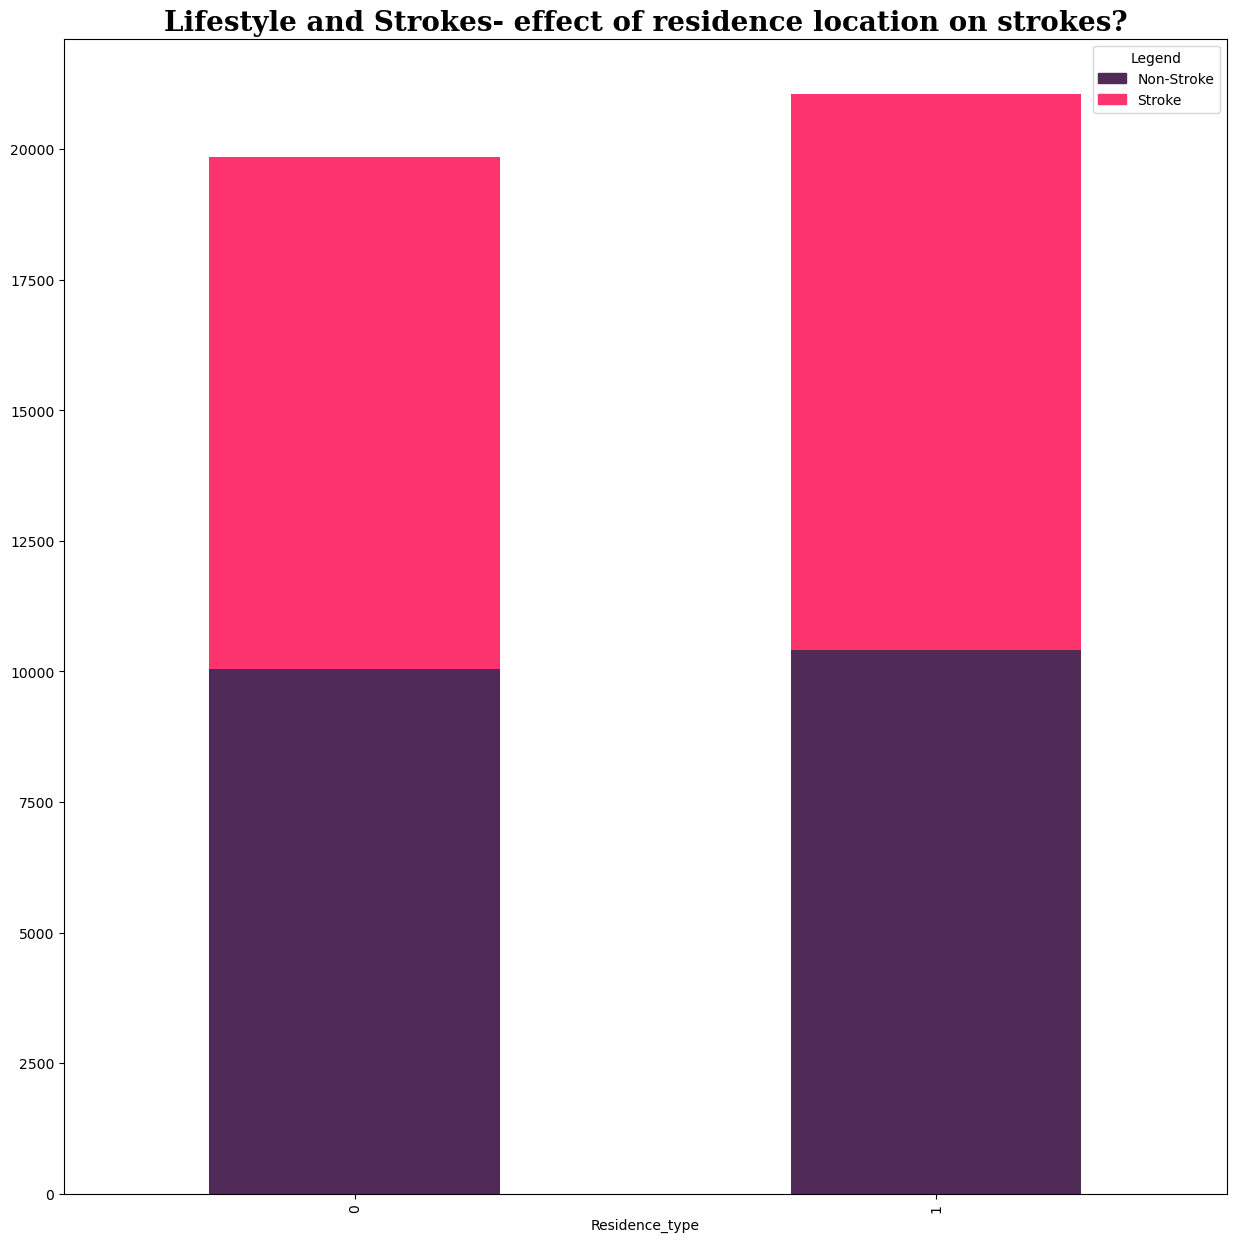

In [5]:
plot_stacking_bars(df_origin, 'Residence_type', 'stroke', title='Lifestyle and Strokes- effect of residence location on strokes?')

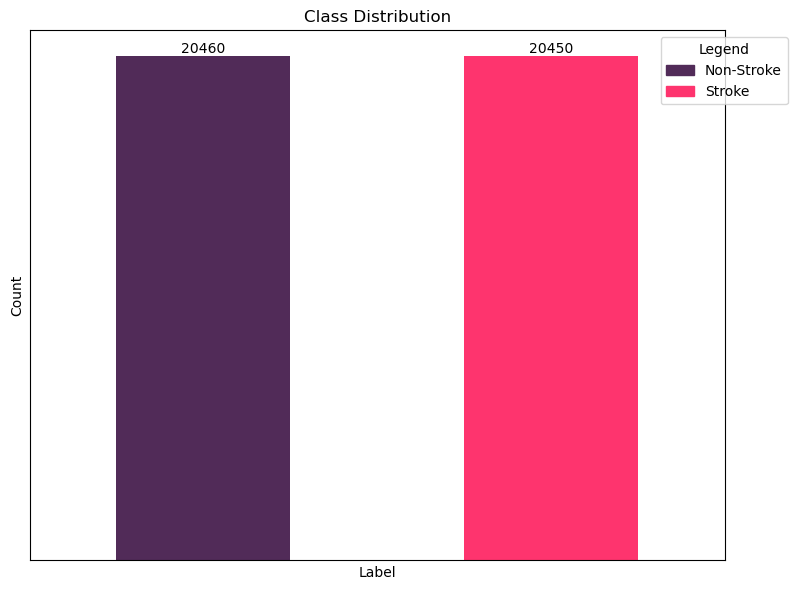

In [6]:
class_distribution(df2, 'stroke')

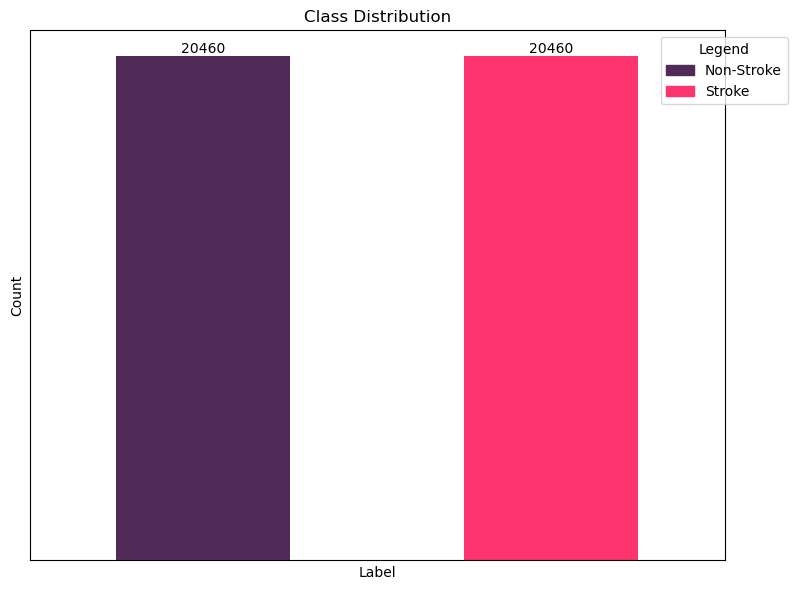

In [7]:
df2_res = SMOTE_resample(df2, 'stroke')
class_distribution(df2_res, 'stroke')

## Data Organisations

In [8]:
X_train, X_test, X_valid, y_train, y_test, y_valid = split_data(df2_res, 'stroke')

(24552, 10)
(24552,)
(8184, 10)
(8184,)
(8184, 10)
(8184,)


## Data Exploration

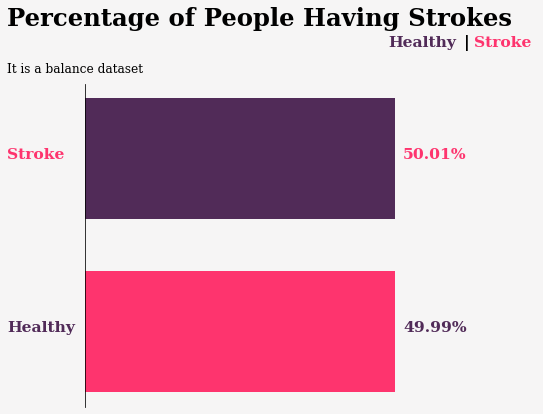

In [9]:
plot_stroke_percentage_df2(df2, title = 'Percentage of People Having Strokes', subtitle = 'It is a balance dataset')

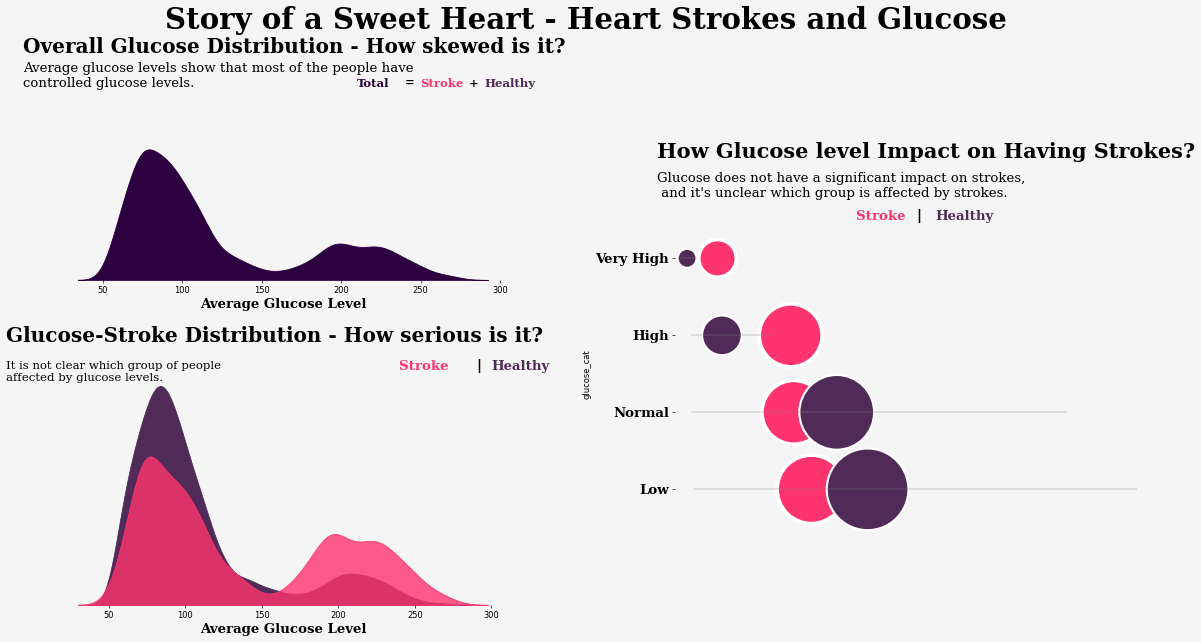

In [10]:
# Sugar distribution plots
fig = plt.figure(figsize=(24, 10), dpi=60)

gs = fig.add_gridspec(10, 24)
gs.update(wspace=1, hspace=0.05)

ax2 = fig.add_subplot(gs[0:3, 0:10])  # Distribution plot
ax3 = fig.add_subplot(gs[5:10, 0:10])  # Hue distribution plot
ax1 = fig.add_subplot(gs[0:, 13:])  # Dumbbell plot

# Axes list
axes = [ax1, ax2, ax3]

# Setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')

    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')

ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# Dumbbell plot of stroke and healthy people
stroke_glu = df_origin[df_origin['stroke'] == 1].glucose_cat.value_counts()
healthy_glu = df_origin[df_origin['stroke'] == 0].glucose_cat.value_counts()

# Adjust hlines coordinates based on your dataset
ax1.hlines(y=['Low', 'Normal', 'High', 'Very High'], xmin=[23160, 19660, 4780, 1010],
           xmax=[890, 710, 710, 180], color='grey', **{'linewidth': 0.5})

ax1.set_yticks([0, 1, 2, 3])
ax1.set_yticklabels(labels=['Low', 'Normal', 'High', 'Very High'],
                    fontdict={'font': 'Serif', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

sns.scatterplot(y=stroke_glu.index, x=stroke_glu.values, s=stroke_glu.values, color='#fe346e', ax=ax1, alpha=1)
sns.scatterplot(y=healthy_glu.index, x=healthy_glu.values, s=healthy_glu.values, color='#512b58', ax=ax1, alpha=1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin=-100, xmax=25000)
ax1.set_ylim(ymin=-1.5, ymax=4.5)

ax1.set_yticklabels(labels=['Low', 'Normal', 'High', 'Very High'],
                    fontdict={'font': 'Serif', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

ax1.text(-1000, 4.3, 'How Glucose level Impact on Having Strokes?', {'font': 'Serif', 'size': '25', 'weight': 'bold', 'color': 'black'})
ax1.text(9000, 3.5, 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'weight': 'bold', 'style': 'normal', 'color': '#fe346e'})
ax1.text(12050, 3.5, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
ax1.text(13000, 3.5, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'weight': 'bold', 'color': '#512b58'})
ax1.text(-1000, 3.8, 'Glucose does not have a significant impact on strokes,\n and it\'s unclear which group is affected by strokes.',
         {'font': 'Serif', 'size': '16', 'color': 'black'})

sns.kdeplot(data=df_origin, x='avg_glucose_level', ax=ax2, fill=True, color='#2c003e', alpha=1)
ax2.set_xlabel('Average Glucose Level', fontdict={'font': 'Serif', 'color': 'black', 'size': 16, 'weight': 'bold'})
ax2.text(0, 0.0235, 'Overall Glucose Distribution - How skewed is it?', {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 24})
ax2.text(0, 0.0200, 'Average glucose levels show that most of the people have \ncontrolled glucose levels.',
          {'font': 'Serif', 'size': '16', 'color': 'black'})
ax2.text(210, 0.020, 'Total', {'font': 'Serif', 'size': '14', 'color': '#2c003e', 'weight': 'bold'})
ax2.text(240, 0.02, '=', {'font': 'Serif', 'size': '14', 'color': 'black', 'weight': 'bold'})
ax2.text(250, 0.02, 'Stroke', {'font': 'Serif', 'size': '14', 'color': '#fe346e', 'weight': 'bold'})
ax2.text(280, 0.02, '+', {'font': 'Serif', 'size': '14', 'color': 'black', 'weight': 'bold'})
ax2.text(290, 0.02, 'Healthy', {'font': 'Serif', 'size': '14', 'color': '#512b58', 'weight': 'bold'})

# Distribution plots with hue of strokes
sns.kdeplot(data=df_origin[df_origin['stroke'] == 0], x='avg_glucose_level', ax=ax3, fill=True, alpha=1, color='#512b58')
sns.kdeplot(data=df_origin[df_origin['stroke'] == 1], x='avg_glucose_level', ax=ax3, fill=True, alpha=0.8, color='#fe346e')

ax3.set_xlabel('Average Glucose Level', fontdict={'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 16})

ax3.text(-17, 0.0195, 'Glucose-Stroke Distribution - How serious is it?',
          {'font': 'Serif', 'weight': 'bold', 'color': 'black', 'size': 24})
ax3.text(-17, 0.0166, 'It is not clear which group of people \naffected by glucose levels.',
          {'font': 'Serif', 'color': 'black', 'size': 14})
ax3.text(240, 0.0174, 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'weight': 'bold', 'style': 'normal', 'color': '#fe346e'})
ax3.text(290, 0.0174, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
ax3.text(300, 0.0174, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'weight': 'bold', 'color': '#512b58'})

fig.text(0.2, 1.07, 'Story of a Sweet Heart - Heart Strokes and Glucose', {'font': 'Serif', 'weight': 'bold', 'color': 'black', 'size': 35})

plt.show()

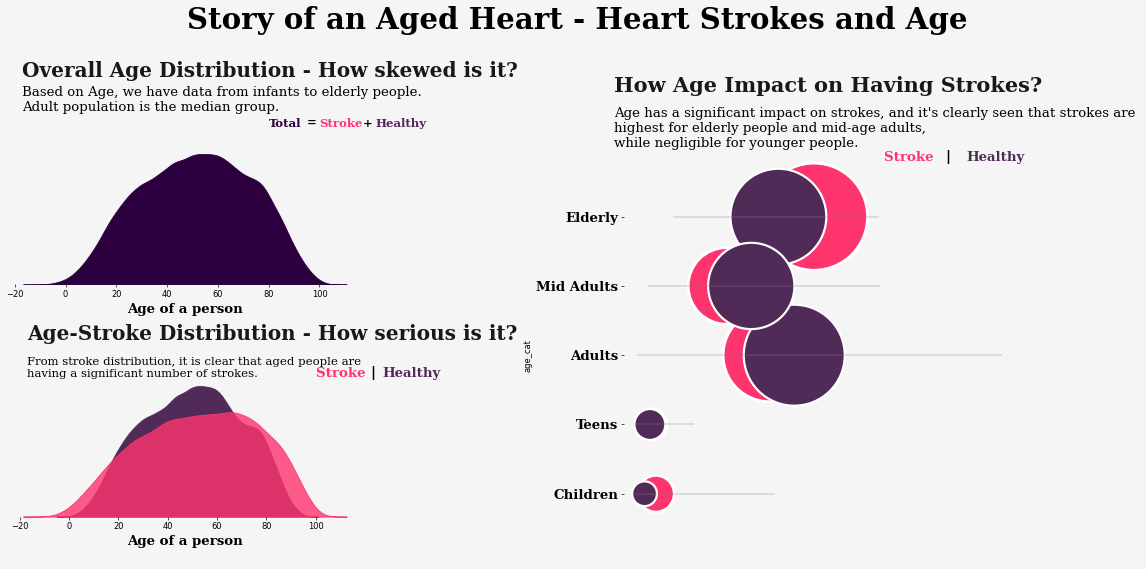

In [11]:
fig = plt.figure(figsize=(24, 10), dpi=60)

gs = fig.add_gridspec(10, 24)
gs.update(wspace=1, hspace=0.05)

ax2 = fig.add_subplot(gs[1:4, 0:8])  # Distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8])  # Hue distribution plot
ax1 = fig.add_subplot(gs[1:10, 13:])  # Dumbbell plot

# Axes list
axes = [ax1, ax2, ax3]

# Setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')

    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')

ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# Dumbbell plot of stroke and healthy people
stroke_age = df_origin[df_origin['stroke'] == 1].age_cat.value_counts()
healthy_age = df_origin[df_origin['stroke'] == 0].age_cat.value_counts()

# Adjust hlines coordinates based on your dataset
ax1.hlines(y=[0, 1, 2, 3, 4], xmin=[6440, 2700, 16910, 11290, 11270],
           xmax=[10, 10, 110, 590, 1770], color='grey', **{'linewidth': 0.5})

ax1.set_yticks([0, 1, 2, 3, 4])
ax1.set_yticklabels(labels=['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'],
                    fontdict={'font': 'Serif', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

sns.scatterplot(y=stroke_age.index, x=stroke_age.values, s=stroke_age.values * 2, color='#fe346e', ax=ax1, alpha=1)
sns.scatterplot(y=healthy_age.index, x=healthy_age.values, s=healthy_age.values * 2, color='#512b58', ax=ax1, alpha=1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin=-500, xmax=22500)
ax1.set_ylim(ymin=-1, ymax=5)

ax1.set_yticklabels(labels=['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'],
                    fontdict={'font': 'Serif', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

ax1.text(-950, 5.8, 'How Age Impact on Having Strokes?', {'font': 'Serif', 'size': '25', 'weight': 'bold', 'color': 'black'},
         alpha=0.9)
ax1.text(11500, 4.8, 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'weight': 'bold', 'style': 'normal',
                                'color': '#fe346e'})
ax1.text(14300, 4.8, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
ax1.text(15300, 4.8, 'Healthy',
         {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'weight': 'bold', 'color': '#512b58'})
ax1.text(-950, 5., 'Age has a significant impact on strokes, and it\'s clearly seen that strokes are \nhighest for elderly people and mid-age adults, \nwhile negligible for younger people.',
         {'font': 'Serif', 'size': '16', 'color': 'black'})

# Distribution plots ---- only single variable

sns.kdeplot(data=df_origin, x='age', ax=ax2, fill=True, color='#2c003e', alpha=1)
ax2.set_xlabel('Age of a person', fontdict={'font': 'Serif', 'color': 'black', 'size': 16, 'weight': 'bold'})
ax2.text(-17, 0.025, 'Overall Age Distribution - How skewed is it?',
          {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 24}, alpha=0.9)
ax2.text(-17, 0.021, 'Based on Age, we have data from infants to elderly people.\nAdult population is the median group.',
          {'font': 'Serif', 'size': '16', 'color': 'black'})
ax2.text(80, 0.019, 'Total', {'font': 'Serif', 'size': '14', 'color': '#2c003e', 'weight': 'bold'})
ax2.text(95, 0.019, '=', {'font': 'Serif', 'size': '14', 'color': 'black', 'weight': 'bold'})
ax2.text(100, 0.019, 'Stroke', {'font': 'Serif', 'size': '14', 'color': '#fe346e', 'weight': 'bold'})
ax2.text(117, 0.019, '+', {'font': 'Serif', 'size': '14', 'color': 'black', 'weight': 'bold'})
ax2.text(122, 0.019, 'Healthy', {'font': 'Serif', 'size': '14', 'color': '#512b58', 'weight': 'bold'})

# Distribution plots with hue of strokes

sns.kdeplot(data=df_origin[df_origin['stroke'] == 0], x='age', ax=ax3, fill=True, alpha=1, color='#512b58')
sns.kdeplot(data=df_origin[df_origin['stroke'] == 1], x='age', ax=ax3, fill=True, alpha=0.8, color='#fe346e')

ax3.set_xlabel('Age of a person', fontdict={'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 16})

ax3.text(-17, 0.024, 'Age-Stroke Distribution - How serious is it?',
          {'font': 'Serif', 'weight': 'bold', 'color': 'black', 'size': 24}, alpha=0.9)
ax3.text(-17, 0.019, 'From stroke distribution, it is clear that aged people are \nhaving a significant number of strokes.',
          {'font': 'Serif', 'color': 'black', 'size': 14})
ax3.text(100, 0.019, 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'weight': 'bold', 'style': 'normal',
                                'color': '#fe346e'})
ax3.text(122, 0.019, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
ax3.text(127, 0.019, 'Healthy',
          {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'weight': 'bold', 'color': '#512b58'})

fig.text(0.25, 1, 'Story of an Aged Heart - Heart Strokes and Age', {'font': 'Serif', 'weight': 'bold', 'color': 'black', 'size': 35})
plt.show()

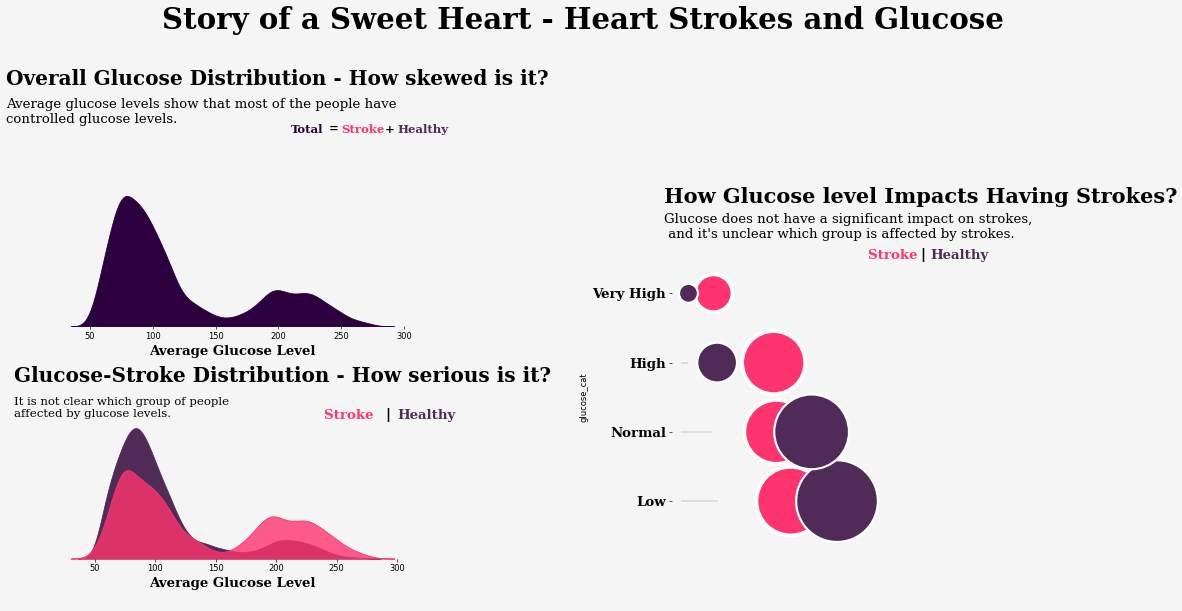

In [12]:
fig = plt.figure(figsize=(24, 10), dpi=60)

gs = fig.add_gridspec(10, 24)
gs.update(wspace=1, hspace=0.05)

ax2 = fig.add_subplot(gs[1:4, 0:8])  # Distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8])  # Hue distribution plot
ax1 = fig.add_subplot(gs[1:10, 13:])  # Dumbbell plot

# Axes list
axes = [ax1, ax2, ax3]

# Setting of axes; visibility of axes and spines turned off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')

    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')

ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# Dumbbell plot of stroke and healthy people
stroke_glu = df_origin[df_origin['stroke'] == 1].glucose_cat.value_counts()
healthy_glu = df_origin[df_origin['stroke'] == 0].glucose_cat.value_counts()

# Set ticks first
ax1.hlines(y=['Low', 'Normal', 'High', 'Very High'], xmin=[2316, 1966, 478, 101],
           xmax=[89, 71, 71, 18], color='grey', **{'linewidth': 0.5})

ax1.set_yticks([0, 1, 2, 3])
ax1.set_yticklabels(labels=['Low', 'Normal', 'High', 'Very High'],
                    fontdict={'font': 'Serif', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

sns.scatterplot(y=stroke_glu.index, x=stroke_glu.values, s=stroke_glu.values, color='#fe346e', ax=ax1, alpha=1)
sns.scatterplot(y=healthy_glu.index, x=healthy_glu.values, s=healthy_glu.values, color='#512b58', ax=ax1, alpha=1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin=-500, xmax=30000)
ax1.set_ylim(ymin=-1.5, ymax=4.5)

ax1.set_yticklabels(labels=['Low', 'Normal', 'High', 'Very High'],
                    fontdict={'font': 'Serif', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

ax1.text(-1000, 4.3, 'How Glucose level Impacts Having Strokes?', {'font': 'Serif', 'size': '25', 'weight': 'bold', 'color': 'black'})
ax1.text(11500, 3.5, 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'weight': 'bold', 'style': 'normal', 'color': '#fe346e'})
ax1.text(14700, 3.5, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
ax1.text(15300, 3.5, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'weight': 'bold', 'color': '#512b58'})
ax1.text(-1000, 3.8, 'Glucose does not have a significant impact on strokes,\n and it\'s unclear which group is affected by strokes.',
         {'font': 'Serif', 'size': '16', 'color': 'black'})

# Distribution plots ---- only a single variable

sns.kdeplot(data=df_origin, x='avg_glucose_level', ax=ax2, fill=True, color='#2c003e', alpha=1)
ax2.set_xlabel('Average Glucose Level', fontdict={'font': 'Serif', 'color': 'black', 'size': 16, 'weight': 'bold'})
ax2.text(-17, 0.025, 'Overall Glucose Distribution - How skewed is it?', {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 24})
ax2.text(-17, 0.021, 'Average glucose levels show that most of the people have \ncontrolled glucose levels.',
          {'font': 'Serif', 'size': '16', 'color': 'black'})
ax2.text(210, 0.020, 'Total', {'font': 'Serif', 'size': '14', 'color': '#2c003e', 'weight': 'bold'})
ax2.text(240, 0.02, '=', {'font': 'Serif', 'size': '14', 'color': 'black', 'weight': 'bold'})
ax2.text(250, 0.02, 'Stroke', {'font': 'Serif', 'size': '14', 'color': '#fe346e', 'weight': 'bold'})
ax2.text(285, 0.02, '+', {'font': 'Serif', 'size': '14', 'color': 'black', 'weight': 'bold'})
ax2.text(295, 0.02, 'Healthy', {'font': 'Serif', 'size': '14', 'color': '#512b58', 'weight': 'bold'})

# Distribution plots with hue of strokes
sns.kdeplot(data=df_origin[df_origin['stroke'] == 0], x='avg_glucose_level', ax=ax3, fill=True, alpha=1, color='#512b58')
sns.kdeplot(data=df_origin[df_origin['stroke'] == 1], x='avg_glucose_level', ax=ax3, fill=True, alpha=0.8, color='#fe346e')

ax3.set_xlabel('Average Glucose Level', fontdict={'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 16})

ax3.text(-17, 0.0220, 'Glucose-Stroke Distribution - How serious is it?',
          {'font': 'Serif', 'weight': 'bold', 'color': 'black', 'size': 24})
ax3.text(-17, 0.0176, 'It is not clear which group of people \naffected by glucose levels.',
          {'font': 'Serif', 'color': 'black', 'size': 14})
ax3.text(240, 0.0174, 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'weight': 'bold', 'style': 'normal', 'color': '#fe346e'})
ax3.text(290, 0.0174, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
ax3.text(300, 0.0174, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'weight': 'bold', 'color': '#512b58'})

fig.text(0.2, 1.07, 'Story of a Sweet Heart - Heart Strokes and Glucose', {'font': 'Serif', 'weight': 'bold', 'color': 'black', 'size': 35})

plt.show()

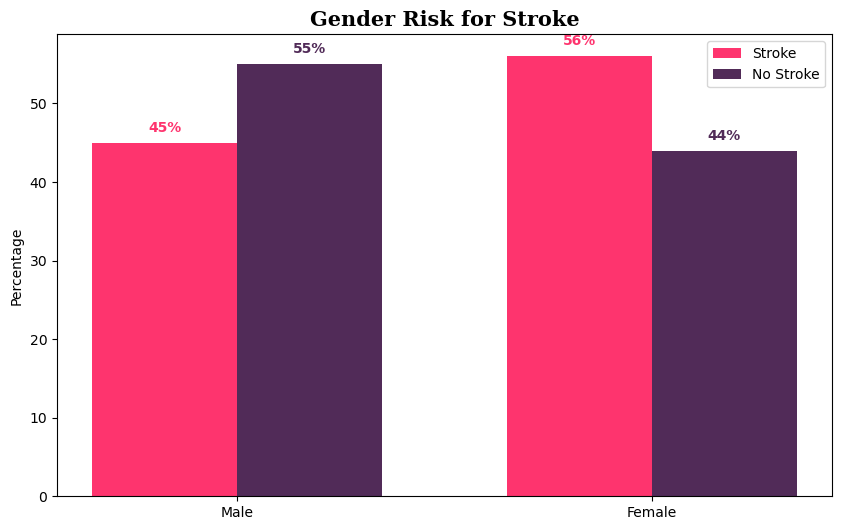

In [13]:
if 'gender' not in df_origin.columns:
    df_origin['gender'] = df_origin['sex'].map({0: 'Female', 1: 'Male'})
    df_origin['work_type'] = df_origin['work_type'].map({0: 'Children', 1: 'Govt_job', 2: 'Never_worked', 3: 'Private', 4: 'Self-employed'})
    df_origin['ever_married'] = df_origin['ever_married'].map({0: 'No', 1: 'Yes'})
    df_origin['Residence_type'] = df_origin['Residence_type'].map({0: 'Rural', 1: 'Urban'})
    df_origin['hypertension'] = df_origin['hypertension'].map({0: 'No', 1: 'Yes'})
    df_origin['heart_disease'] = df_origin['heart_disease'].map({0: 'No', 1: 'Yes'})
    df_origin['smoking_status'] = df_origin['smoking_status'].map({0: 'Never Smoked', 1: 'Smokes'})
    plot_categorical_stroke(df_origin, 'gender')

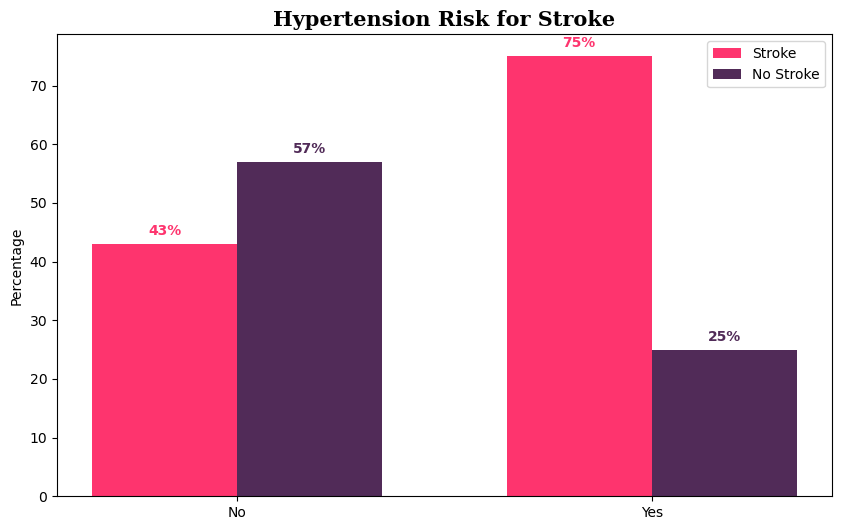

In [14]:
plot_categorical_stroke(df_origin, 'hypertension')

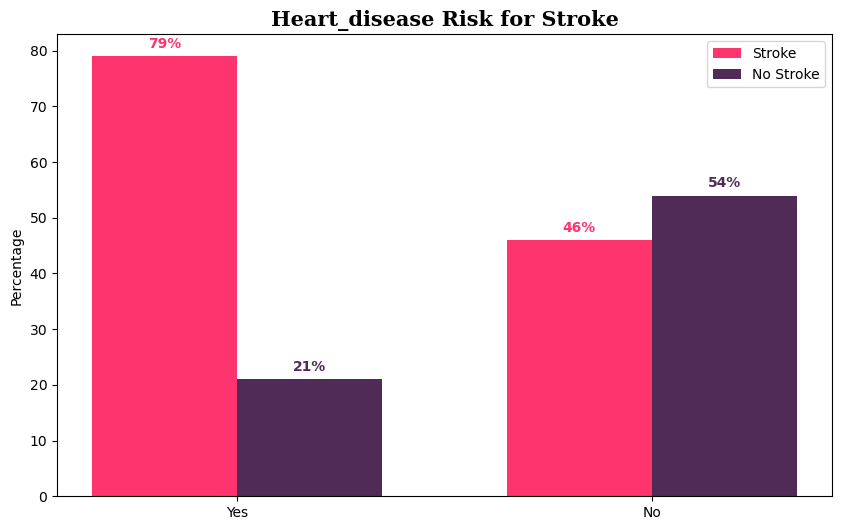

In [15]:
plot_categorical_stroke(df_origin, 'heart_disease')

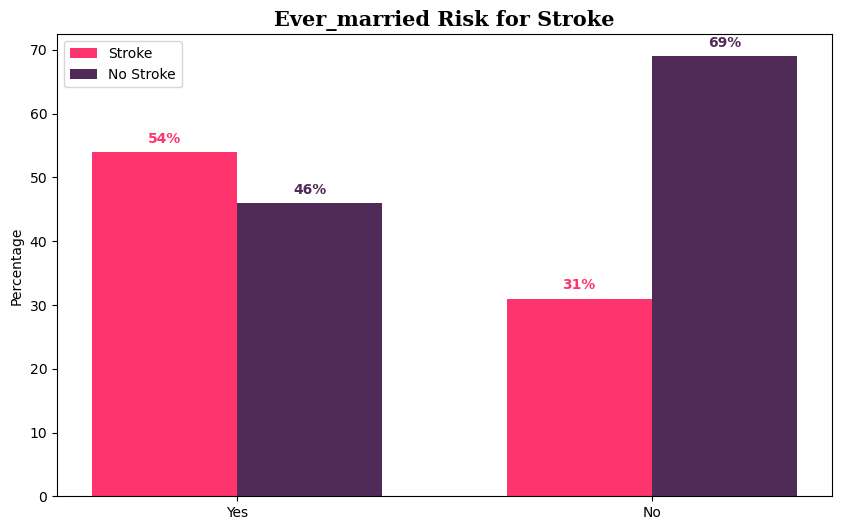

In [16]:
plot_categorical_stroke(df_origin, 'ever_married')

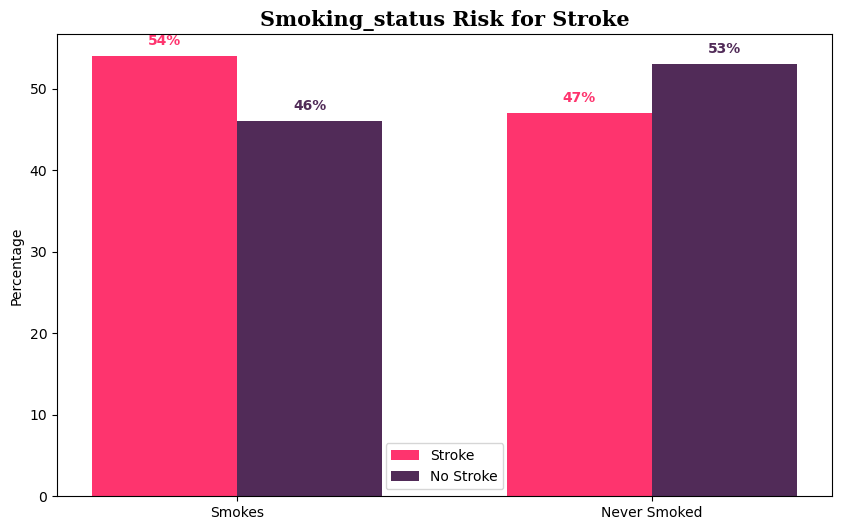

In [17]:
plot_categorical_stroke(df_origin, 'smoking_status')

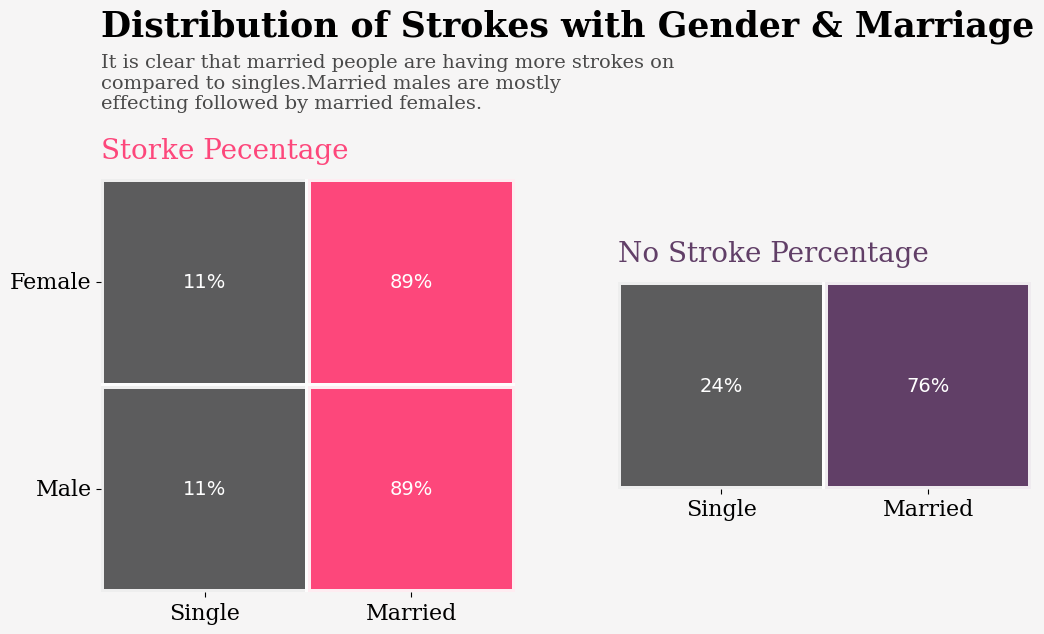

In [18]:
fig = plt.figure(figsize=(12,6),dpi = 100)
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# ever_married, gender, residence, heart_disease and work_type

healthy = df_origin[df_origin['stroke']==0]
stroke = df_origin[df_origin['stroke']==1]

col1 = ["#4b4b4c","#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['ever_married']],normalize='index')
no_stroke = pd.crosstab(healthy['gender'],[healthy['ever_married']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

ax0.text(0, -0.69, 'Distribution of Strokes with Gender & Marriage', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.34, 'It is clear that married people are having more strokes on \ncompared to singles.Married males are mostly \neffecting followed by married females.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

# Set tick labels with the correct font dictionary
ax0.set_xticklabels(['Single', 'Married'], fontdict={'fontname':'serif', 'color':'black', 'size':16})
ax1.set_xticklabels(['Single', 'Married'], fontdict={'fontname':'serif', 'color':'black', 'size':16})

# For y-axis labels, since there's only one set of labels, you don't need to call set_yticklabels twice
ax0.set_yticklabels(['Female', 'Male'], fontdict={'fontname':'serif', 'color':'black', 'size':16}, rotation=0)


ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
plt.show()

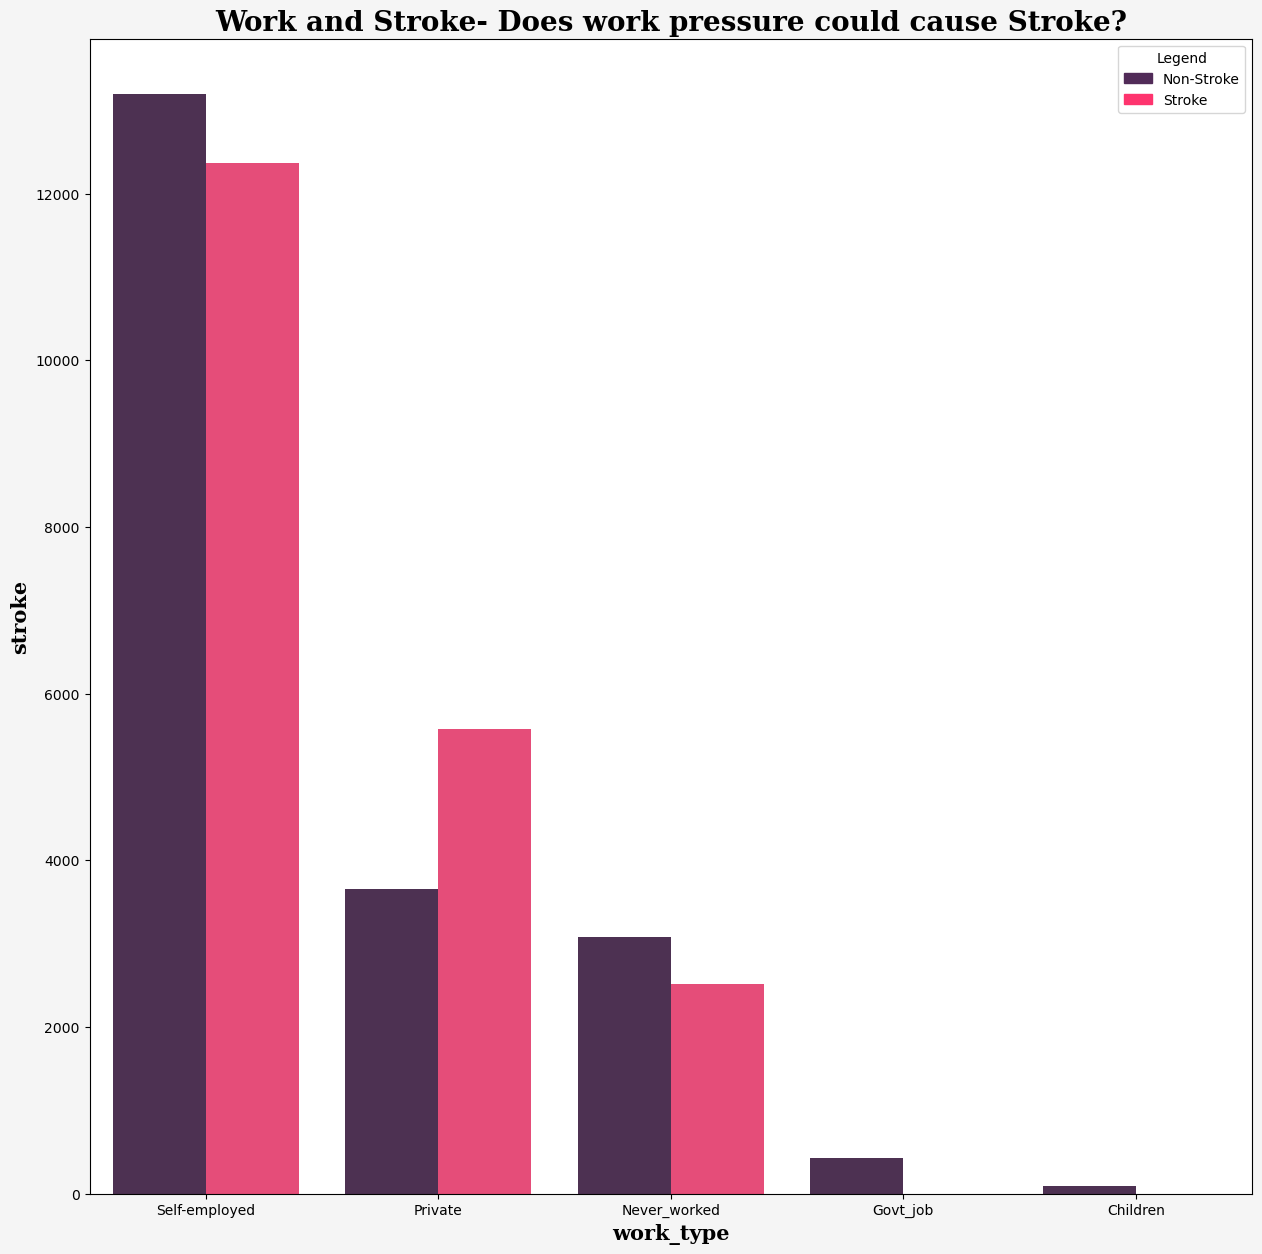

In [19]:
plot_comparison_stroke(df_origin, 'work_type', 'stroke', title='Work and Stroke- Does work pressure could cause Stroke?')

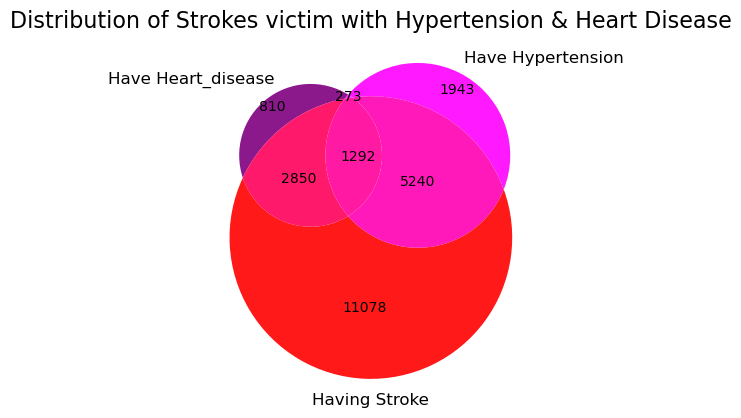

In [20]:
subset1 = set(df_origin[df_origin["heart_disease"] == 'Yes'].index)
subset2 = set(df_origin[df_origin["hypertension"] == 'Yes'].index)
subset3 = set(df_origin[df_origin["stroke"] == 1].index)
plot_venn(subsets=[subset1, subset2, subset3], set_labels=("Have Heart_disease", "Have Hypertension", "Having Stroke"),
          set_colors=("purple", "magenta", "Red"), alpha=0.9, title="Distribution of Strokes victim with Hypertension & Heart Disease")

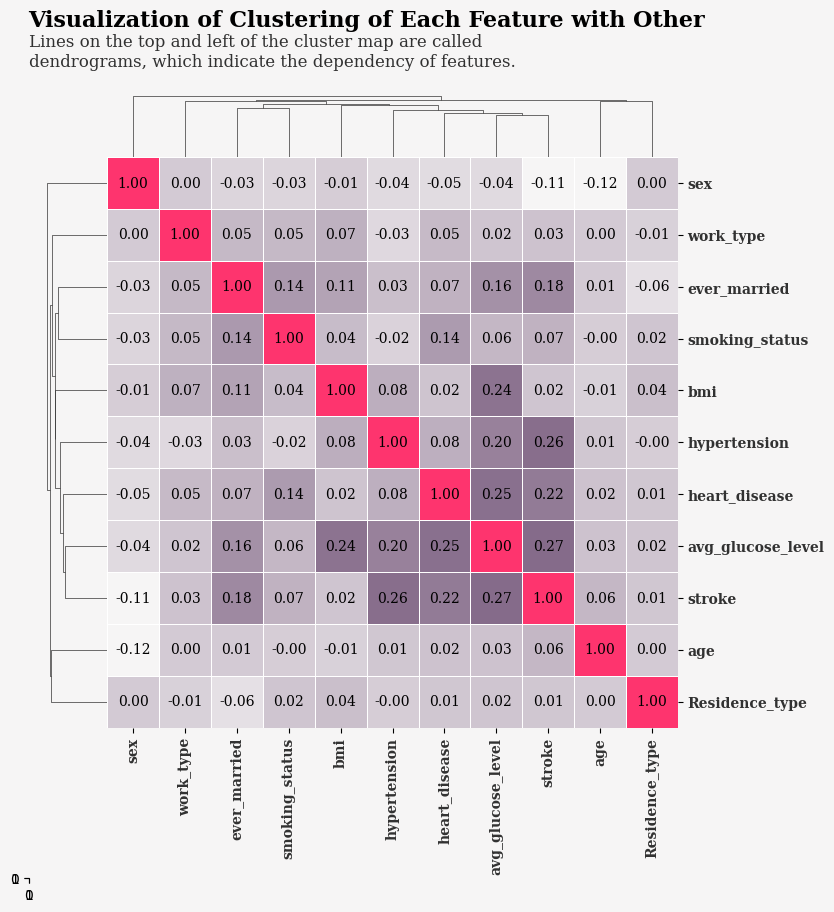

In [21]:
plot_correlation_heatmap(df2)

## Initialize dictionaries to store every model outputs

In [22]:
predictions = {
    1: { # Dataset 1
        'Stroke': [],
        'Stroke After Standard Scaler':[]
    },
    2: { # Dataset 2
        'Stroke': [],
        'Stroke After Standard Scaler': []
    }
}

# Classification

## Convolutional Neural Network (CNN)

In [23]:
cnn, y_pred_cnn, cnn_accuracy, cnn_hist = cnn_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Number of classes:  2


Epoch 1/50


768/768 [==============================] - 3s 3ms/step - loss: 0.6290 - accuracy: 0.6496 - val_loss: 0.5957 - val_accuracy: 0.6823
Epoch 2/50
768/768 [==============================] - 2s 3ms/step - loss: 0.5882 - accuracy: 0.6908 - val_loss: 0.5907 - val_accuracy: 0.6854
Epoch 3/50
768/768 [==============================] - 2s 3ms/step - loss: 0.5790 - accuracy: 0.6952 - val_loss: 0.5780 - val_accuracy: 0.6929
Epoch 4/50
768/768 [==============================] - 2s 3ms/step - loss: 0.5761 - accuracy: 0.6935 - val_loss: 0.5696 - val_accuracy: 0.6975
Epoch 5/50
768/768 [==============================] - 3s 3ms/step - loss: 0.5684 - accuracy: 0.6969 - val_loss: 0.5701 - val_accuracy: 0.6983
Epoch 6/50
768/768 [==============================] - 2s 3ms/step - loss: 0.5618 - accuracy: 0.7027 - val_loss: 0.5660 - val_accuracy: 0.6956
Epoch 7/50
768/768 [==============================] - 2s 3ms/step - loss: 0.5548 - accuracy: 0.7044 - val_loss: 0.5952 - v

## Multilayer Perceptron (MLP)

In [24]:
mlp, y_pred_mlp, mlp_accuracy = mlp_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Train Accuracy:  0.9688009123492994
Test Accuracy:  0.9657869012707723
Validation Accuracy:  0.9632209188660802 

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      4078
           1       0.94      0.99      0.97      4106

    accuracy                           0.97      8184
   macro avg       0.97      0.97      0.97      8184
weighted avg       0.97      0.97      0.97      8184



## Support Vector Machine (SVM)

In [25]:
svm, y_pred_svm, svm_accuracy = svm_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Train Accuracy:  0.6875610948191594
Test Accuracy:  0.6808406647116324
Validation Accuracy:  0.679863147605083 

              precision    recall  f1-score   support

           0       0.65      0.78      0.71      4078
           1       0.73      0.58      0.65      4106

    accuracy                           0.68      8184
   macro avg       0.69      0.68      0.68      8184
weighted avg       0.69      0.68      0.68      8184



## Decision Tree (DT)

In [26]:
dt, y_pred_dt, dt_accuracy = dt_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Train Accuracy:  0.9904284783317041
Test Accuracy:  0.9890029325513197
Validation Accuracy:  0.9880254154447703 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4078
           1       0.99      0.99      0.99      4106

    accuracy                           0.99      8184
   macro avg       0.99      0.99      0.99      8184
weighted avg       0.99      0.99      0.99      8184



## Random Forest (RF)

In [27]:
rf, y_pred_rf, rf_accuracy = rf_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Train Accuracy:  1.0
Test Accuracy:  0.9967008797653959
Validation Accuracy:  0.9970674486803519 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4078
           1       0.99      1.00      1.00      4106

    accuracy                           1.00      8184
   macro avg       1.00      1.00      1.00      8184
weighted avg       1.00      1.00      1.00      8184



## LightGBM

In [28]:
lgbm, y_pred_lgbm, lgbm_accuracy = lgbm_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Train Accuracy:  1.0
Test Accuracy:  1.0
Validation Accuracy:  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4078
           1       1.00      1.00      1.00      4106

    accuracy                           1.00      8184
   macro avg       1.00      1.00      1.00      8184
weighted avg       1.00      1.00      1.00      8184



## XGBoost

In [29]:
xgb, y_pred_xgb, xgb_accuracy = xgboost_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Train Accuracy:  0.9980449657869013
Test Accuracy:  0.9962121212121212
Validation Accuracy:  0.9964565004887586 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4078
           1       0.99      1.00      1.00      4106

    accuracy                           1.00      8184
   macro avg       1.00      1.00      1.00      8184
weighted avg       1.00      1.00      1.00      8184



## CatBoost

In [30]:
cat, y_pred_cat, cat_accuracy = catboost_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Learning rate set to 0.333811
0:	learn: 0.6319514	total: 133ms	remaining: 13.2s
1:	learn: 0.5997220	total: 136ms	remaining: 6.68s
2:	learn: 0.5710716	total: 139ms	remaining: 4.49s
3:	learn: 0.5598093	total: 141ms	remaining: 3.39s
4:	learn: 0.5487899	total: 144ms	remaining: 2.74s
5:	learn: 0.5376472	total: 147ms	remaining: 2.31s
6:	learn: 0.5319893	total: 150ms	remaining: 1.99s
7:	learn: 0.5238771	total: 153ms	remaining: 1.76s
8:	learn: 0.5135237	total: 156ms	remaining: 1.58s
9:	learn: 0.4976640	total: 159ms	remaining: 1.43s
10:	learn: 0.4914498	total: 162ms	remaining: 1.31s
11:	learn: 0.4850139	total: 164ms	remaining: 1.21s
12:	learn: 0.4757718	total: 167ms	remaining: 1.12s
13:	learn: 0.4681344	total: 170ms	remaining: 1.04s
14:	learn: 0.4640622	total: 172ms	remaining: 976ms
15:	learn: 0.4584715	total: 175ms	remaining: 919ms
16:	learn: 0.4551294	total: 178ms	remaining: 868ms
17:	learn: 0.4491478	total: 181ms	remaining: 823ms
18:	learn: 0.4448547	total: 183ms	remaining: 782ms
19:	learn: 

# Hyperparameter Tuning

## Parameter Setting

In [31]:
# Define the parameter grid for MLP
params_grid_mlp = {
    'hidden_layer_sizes': [(200, 200, 200), (300, 300, 300)],
    'activation': ['relu'],
    'solver': ['adam'],
    'max_iter': [500],
    'random_state': [101],
}

# Define the parameter grid for SVM
params_grid_svm = {
    'C': [0.1, 1],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto'],
    'decision_function_shape': ['ovo', 'ovr'],
    'probability': [True],
    'random_state': [101]
}

# Define the parameter grid for DT
params_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'random_state': [101]
}

# Define the parameter grid for RF
params_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [20, 30, 40],
    'bootstrap': [True],
    'max_features': [10, 20, 30],
    'random_state': [101],
}

# Define the parameter grid for LightGBM
params_grid_lgbm = {
    'num_leaves': [64, 128],
    # 'reg_alpha': [0.1, 0.5, 1, 2],
    # 'reg_lambda': [0.1, 0.5, 1, 2],
    'min_split_gain': [0.0, 0.1],
    'learning_rate': [0.1, 0.2],
    'max_depth': [15, 25],
    'n_estimators': [500, 600],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8],
    'verbose': [-1],
    'random_state': [101]
}

# Define the parameter grid for XGBoost
params_grid_xgb = {
    'n_estimators': [200, 300, 350],
    'learning_rate': [0.1, 0.5],
    'max_depth': [8, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8],
    'random_state': [101],
}

# Define the parameter grid for CatBoost
params_grid_cat = {
    'n_estimators': [50, 100, 200, 300],
    'random_state': [42, 101],
    'learning_rate': [0.01, 0.1, 0.5],
}

## CNN

In [32]:
cnn, best_param_cnn, y_pred_cnn, cnn_accuracy, cnn_history = cnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid, epochs=100, dataset_num=2)

Reloading Tuner from dir2\cnn_hyperparameter_tuning2\tuner0.json
Epoch 1/100
768/768 [==============================] - 3s 3ms/step - loss: 0.6821 - accuracy: 0.5868 - val_loss: 0.6829 - val_accuracy: 0.6013
Epoch 2/100
768/768 [==============================] - 2s 3ms/step - loss: 0.6680 - accuracy: 0.6057 - val_loss: 0.6566 - val_accuracy: 0.6272
Epoch 3/100
768/768 [==============================] - 2s 3ms/step - loss: 0.6186 - accuracy: 0.6751 - val_loss: 0.6065 - val_accuracy: 0.6893
Epoch 4/100
768/768 [==============================] - 2s 3ms/step - loss: 0.5925 - accuracy: 0.6956 - val_loss: 0.5886 - val_accuracy: 0.6957
Epoch 5/100
768/768 [==============================] - 2s 3ms/step - loss: 0.5797 - accuracy: 0.7015 - val_loss: 0.5742 - val_accuracy: 0.7012
Epoch 6/100
768/768 [==============================] - 2s 3ms/step - loss: 0.5722 - accuracy: 0.7053 - val_loss: 0.5716 - val_accuracy: 0.7069
Epoch 7/100
768/768 [==============================] - 2s 3ms/step - loss: 0.

## MLP

In [33]:
mlp, best_param_mlp, y_pred_mlp, mlp_accuracy = hyperparameter_tuning('mlp', params_grid_mlp, X_train, y_train, X_test, y_test, verbose=1)

Hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (200, 200, 200), 'max_iter': 500, 'random_state': 101, 'solver': 'adam'}
Testing Accuracy: 0.9732404692082112

Hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (300, 300, 300), 'max_iter': 500, 'random_state': 101, 'solver': 'adam'}
Testing Accuracy: 0.9696969696969697

Best Hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (200, 200, 200), 'max_iter': 500, 'random_state': 101, 'solver': 'adam'}
Best Testing Accuracy: 0.9732404692082112


## SVM

In [34]:
svm, best_param_svm, y_pred_svm, svm_accuracy = hyperparameter_tuning('svm', params_grid_svm, X_train, y_train, X_test, y_test, verbose=1)

Hyperparameters: {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'probability': True, 'random_state': 101}
Testing Accuracy: 0.6229227761485826

Hyperparameters: {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf', 'probability': True, 'random_state': 101}
Testing Accuracy: 0.6834066471163245

Hyperparameters: {'C': 0.1, 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'rbf', 'probability': True, 'random_state': 101}
Testing Accuracy: 0.6229227761485826

Hyperparameters: {'C': 0.1, 'decision_function_shape': 'ovr', 'gamma': 'auto', 'kernel': 'rbf', 'probability': True, 'random_state': 101}
Testing Accuracy: 0.6834066471163245

Hyperparameters: {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'probability': True, 'random_state': 101}
Testing Accuracy: 0.6441837732160313

Hyperparameters: {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf', 'probability': True, 'ran

## DT

In [35]:
dt, best_param_dt, y_pred_dt, dt_accuracy = hyperparameter_tuning('dt', params_grid_dt, X_train, y_train, X_test, y_test, verbose=1)

Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 101}
Testing Accuracy: 0.9890029325513197

Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 101}
Testing Accuracy: 0.9883919843597263

Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 101}
Testing Accuracy: 0.9883919843597263

Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 101}
Testing Accuracy: 0.9879032258064516

Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 101}
Testing Accuracy: 0.9879032258064516

Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'random_state': 101}
Testing Accuracy: 0.9879032258064516

Hyperparameters: {'criteri

## RF

In [36]:
rf, best_param_rf, y_pred_rf, rf_accuracy = hyperparameter_tuning('rf', params_grid_rf, X_train, y_train, X_test, y_test, verbose=1)

Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 10, 'n_estimators': 100, 'random_state': 101}
Testing Accuracy: 0.9990224828934506

Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 10, 'n_estimators': 200, 'random_state': 101}
Testing Accuracy: 0.999266862170088

Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 20, 'n_estimators': 100, 'random_state': 101}
Testing Accuracy: 0.9990224828934506

Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 20, 'n_estimators': 200, 'random_state': 101}
Testing Accuracy: 0.999266862170088

Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 30, 'n_estimators': 100, 'random_state': 101}
Testing Accuracy: 0.9990224828934506

Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 30, 'n_estimators': 200, 'random_state': 101}
Testing Accuracy: 0.999266862170088

Hyperparameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 10, 'n_es

## LightGBM

In [37]:
lgbm, best_param_lgbm, y_pred_lgbm, lgbm_accuracy = hyperparameter_tuning('lgbm', params_grid_lgbm, X_train, y_train, X_test, y_test, verbose=1)

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 15, 'min_split_gain': 0.0, 'n_estimators': 500, 'num_leaves': 64, 'random_state': 101, 'subsample': 0.6, 'verbose': -1}
Testing Accuracy: 1.0

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 15, 'min_split_gain': 0.0, 'n_estimators': 500, 'num_leaves': 64, 'random_state': 101, 'subsample': 0.8, 'verbose': -1}
Testing Accuracy: 1.0

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 15, 'min_split_gain': 0.0, 'n_estimators': 500, 'num_leaves': 64, 'random_state': 101, 'subsample': 1.0, 'verbose': -1}
Testing Accuracy: 1.0

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 15, 'min_split_gain': 0.0, 'n_estimators': 500, 'num_leaves': 128, 'random_state': 101, 'subsample': 0.6, 'verbose': -1}
Testing Accuracy: 1.0

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 15, 'min_split_gain': 0.0, 'n_estimat

## XGBoost

In [38]:
xgb, best_param_xgb, y_pred_xgb, xgb_accuracy = hyperparameter_tuning('xgb', params_grid_xgb, X_train, y_train, X_test, y_test, verbose=1)

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 200, 'random_state': 101, 'subsample': 0.8}
Testing Accuracy: 0.9978005865102639

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 200, 'random_state': 101, 'subsample': 1.0}
Testing Accuracy: 0.9959677419354839

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 300, 'random_state': 101, 'subsample': 0.8}
Testing Accuracy: 0.9987781036168133

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 300, 'random_state': 101, 'subsample': 1.0}
Testing Accuracy: 0.9984115347018573

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 350, 'random_state': 101, 'subsample': 0.8}
Testing Accuracy: 0.99926686

## CatBoost

In [39]:
cat, best_param_cat, y_pred_cat, cat_accuracy = hyperparameter_tuning('cat', params_grid_cat, X_train, y_train, X_test, y_test, verbose=1)

0:	learn: 0.6909751	total: 4.83ms	remaining: 237ms
1:	learn: 0.6887403	total: 9.82ms	remaining: 236ms
2:	learn: 0.6865704	total: 14.1ms	remaining: 221ms
3:	learn: 0.6844263	total: 18.7ms	remaining: 215ms
4:	learn: 0.6823338	total: 22.8ms	remaining: 206ms
5:	learn: 0.6802841	total: 27.4ms	remaining: 201ms
6:	learn: 0.6782318	total: 31.8ms	remaining: 196ms
7:	learn: 0.6762713	total: 36ms	remaining: 189ms
8:	learn: 0.6744461	total: 40.4ms	remaining: 184ms
9:	learn: 0.6725778	total: 45ms	remaining: 180ms
10:	learn: 0.6706627	total: 49.5ms	remaining: 175ms
11:	learn: 0.6687983	total: 53.8ms	remaining: 170ms
12:	learn: 0.6670435	total: 58.5ms	remaining: 166ms
13:	learn: 0.6652354	total: 62.4ms	remaining: 160ms
14:	learn: 0.6636557	total: 66ms	remaining: 154ms
15:	learn: 0.6619241	total: 69.6ms	remaining: 148ms
16:	learn: 0.6602531	total: 73.5ms	remaining: 143ms
17:	learn: 0.6585477	total: 77.2ms	remaining: 137ms
18:	learn: 0.6568774	total: 80.8ms	remaining: 132ms
19:	learn: 0.6552491	total: 

## Store Results

In [40]:
# Store results to dictionaries Stroke
predictions[2]['Stroke'].append(('CNN', cnn, y_pred_cnn, y_test, cnn_accuracy, best_param_cnn, cnn_hist))
predictions[2]['Stroke'].append(('MLP', mlp, y_pred_mlp, y_test, mlp_accuracy, best_param_mlp))
predictions[2]['Stroke'].append(('SVM', svm, y_pred_svm, y_test, svm_accuracy, best_param_svm))
predictions[2]['Stroke'].append(('Decision Tree', dt, y_pred_dt, y_test, dt_accuracy, best_param_dt))
predictions[2]['Stroke'].append(('RF', rf, y_pred_rf, y_test, rf_accuracy, best_param_rf))
predictions[2]['Stroke'].append(('LightGBM', lgbm, y_pred_lgbm, y_test, lgbm_accuracy, best_param_lgbm))
predictions[2]['Stroke'].append(('XGBoost', xgb, y_pred_xgb, y_test, xgb_accuracy, best_param_xgb))
predictions[2]['Stroke'].append(('CatBoost', cat, y_pred_cat, y_test, cat_accuracy, best_param_cat))

# Visualizations

## Error Analysis

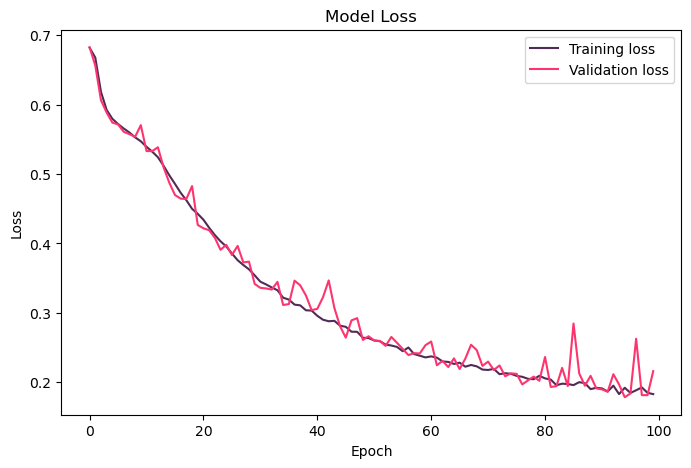

In [41]:
plot_history(cnn_history)

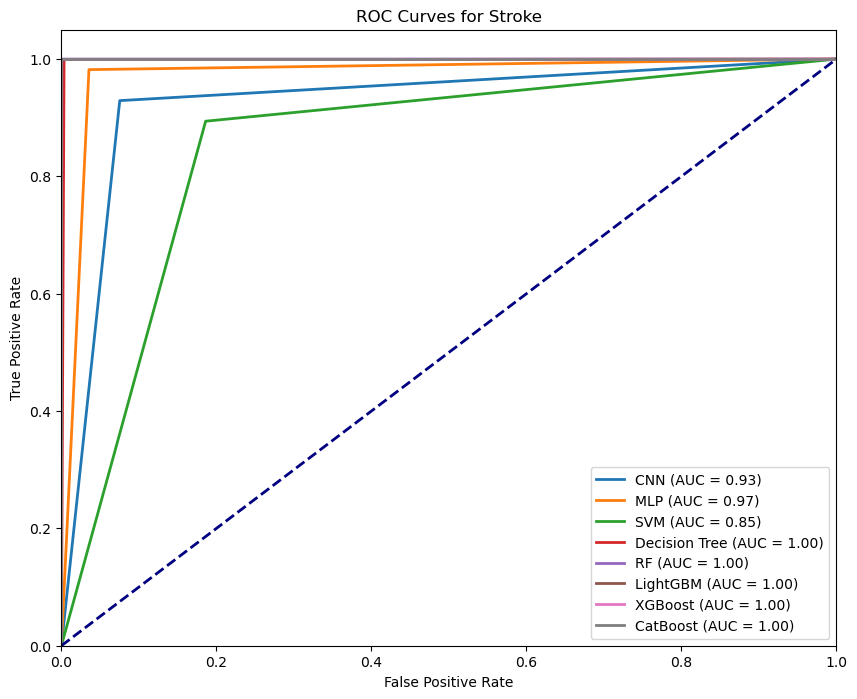

In [42]:
plot_all_roc_curves(predictions, 2, 'Stroke')

## Performance Evaluation

In [43]:
metrics = {
    'CNN': {'Best Parameter': best_param_cnn.get_config(), 'Accuracy': cnn_accuracy},
    'MLP': {'Best Parameter': best_param_mlp, 'Accuracy': mlp_accuracy},
    'SVM': {'Best Parameter': best_param_svm, 'Accuracy': svm_accuracy},
    'Decision Tree': {'Best Parameter': best_param_dt, 'Accuracy': dt_accuracy},
    'Random Forest': {'Best Parameter': best_param_rf, 'Accuracy': rf_accuracy},
    'LightGBM': {'Best Parameter': best_param_lgbm, 'Accuracy': lgbm_accuracy},
    'XGBoost': {'Best Parameter': best_param_xgb, 'Accuracy': xgb_accuracy},
    'CatBoost': {'Best Parameter': best_param_cat, 'Accuracy': cat_accuracy},
}

# Call print metrics
display_metrics(metrics)

Model           Best Parameter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

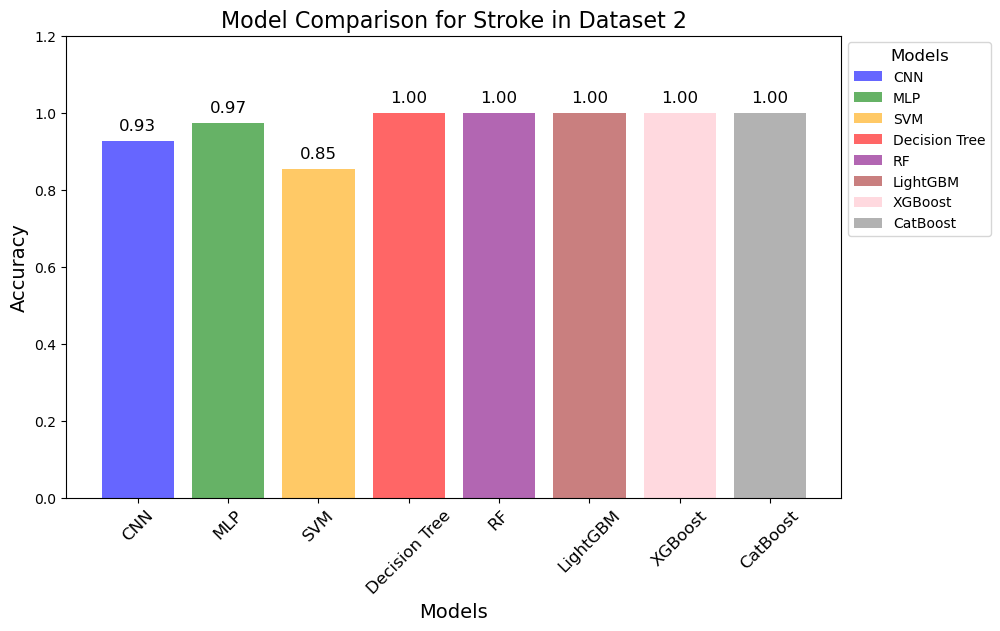

In [44]:
plot_comparison(predictions, 2, 'Stroke')

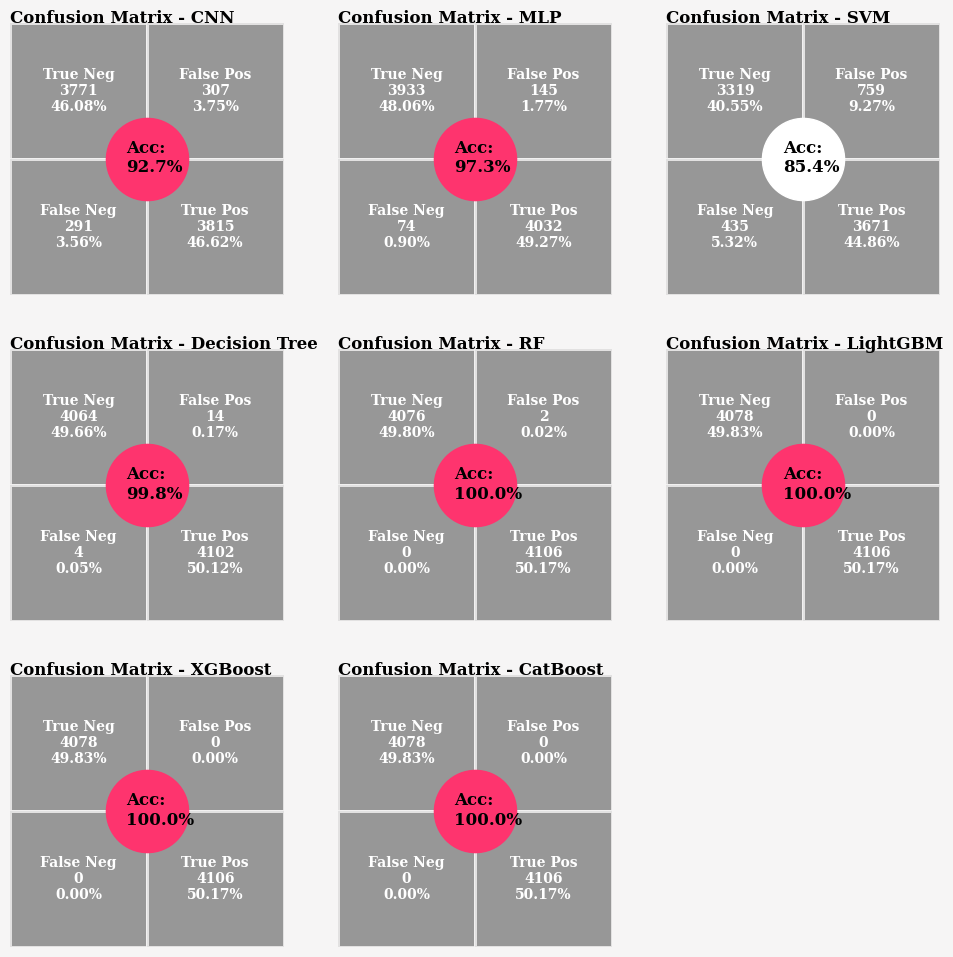

In [45]:
plot_confusion_matrices(predictions, 2, 'Stroke')

## Feature Importance Visualizations

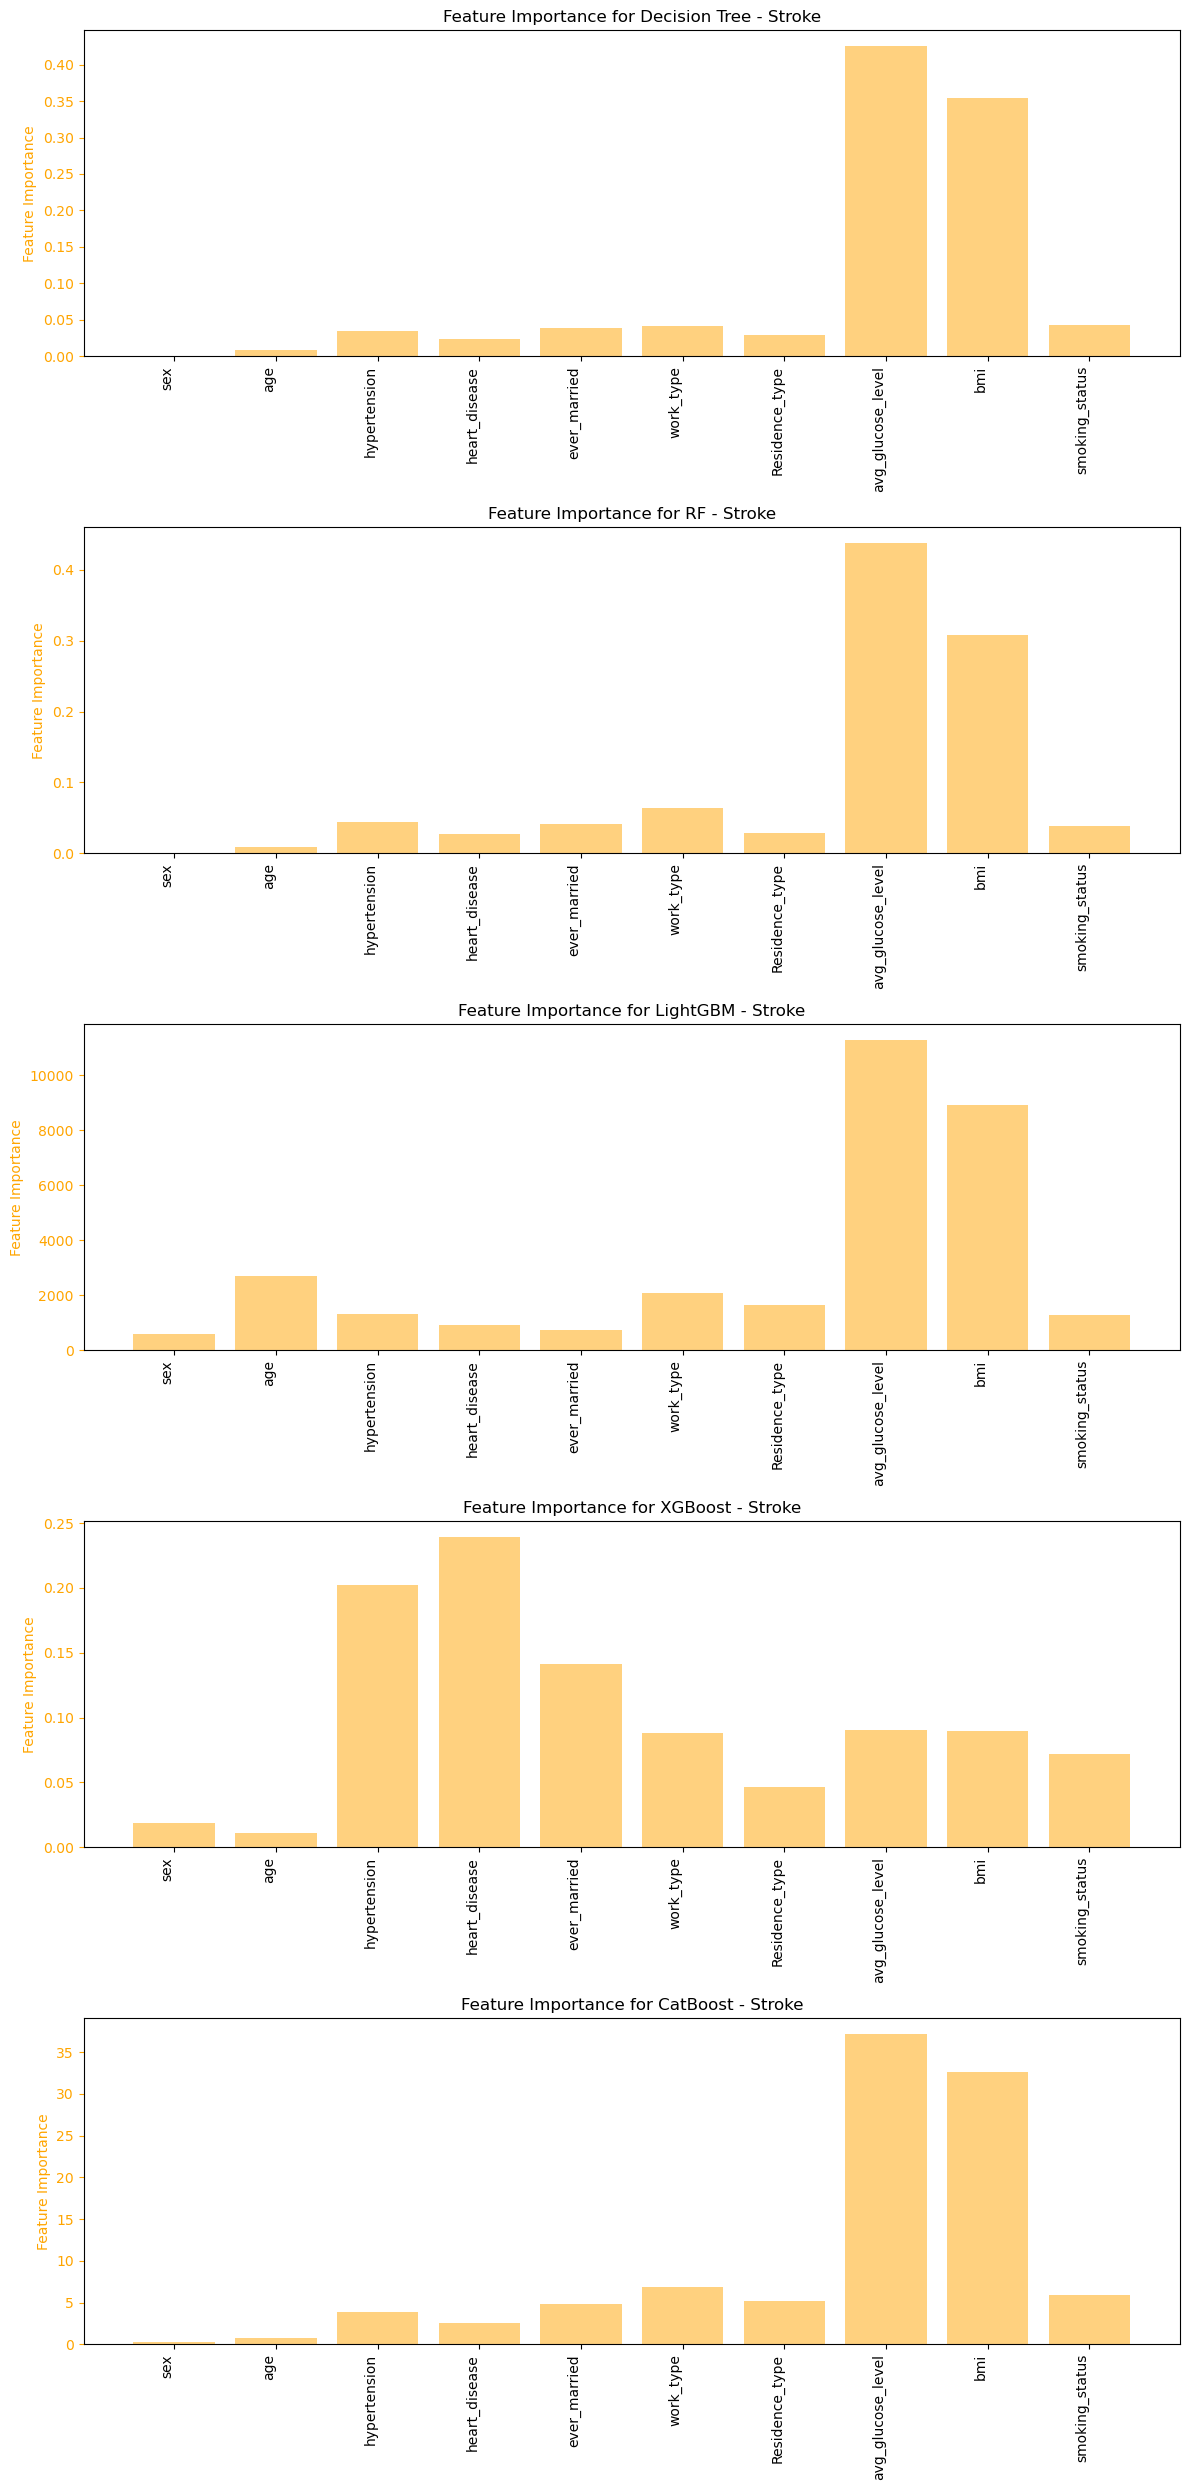

In [46]:
plot_feature_importance(predictions, 2, 'Stroke', df2.drop('stroke', axis=1))

# Enhancement - Feature Scaling Effect

In [47]:
X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid = split_data(df2_res, 'stroke', apply_standard_scaler=True)

(24552, 10)
(24552,)
(8184, 10)
(8184,)
(8184, 10)
(8184,)


## CNN

In [48]:
cnn, best_param_cnn, y_pred_cnn, cnn_accuracy, cnn_history = cnn_classifier_hp(X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid, epochs=100)

Reloading Tuner from dir\cnn_hyperparameter_tuning\tuner0.json
Epoch 1/100
768/768 [==============================] - 2s 2ms/step - loss: 0.5680 - accuracy: 0.7158 - val_loss: 0.5416 - val_accuracy: 0.7320
Epoch 2/100
768/768 [==============================] - 1s 2ms/step - loss: 0.5230 - accuracy: 0.7445 - val_loss: 0.5038 - val_accuracy: 0.7553
Epoch 3/100
768/768 [==============================] - 1s 2ms/step - loss: 0.4937 - accuracy: 0.7654 - val_loss: 0.4712 - val_accuracy: 0.7862
Epoch 4/100
768/768 [==============================] - 1s 2ms/step - loss: 0.4668 - accuracy: 0.7844 - val_loss: 0.4611 - val_accuracy: 0.7898
Epoch 5/100
768/768 [==============================] - 1s 2ms/step - loss: 0.4417 - accuracy: 0.8025 - val_loss: 0.4400 - val_accuracy: 0.7969
Epoch 6/100
768/768 [==============================] - 1s 2ms/step - loss: 0.4200 - accuracy: 0.8148 - val_loss: 0.4075 - val_accuracy: 0.8259
Epoch 7/100
768/768 [==============================] - 1s 2ms/step - loss: 0.40

## MLP

In [49]:
mlp, y_pred_mlp, mlp_accuracy = mlp_classifier(X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid, params = best_param_mlp )

Train Accuracy:  0.9789833822091887
Test Accuracy:  0.9738514173998045
Validation Accuracy:  0.9726295210166178 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4078
           1       0.99      0.96      0.97      4106

    accuracy                           0.97      8184
   macro avg       0.97      0.97      0.97      8184
weighted avg       0.97      0.97      0.97      8184



## SVM

In [50]:
svm, y_pred_svm, svm_accuracy = svm_classifier(X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid, params = best_param_svm )

Train Accuracy:  0.7819322254806126
Test Accuracy:  0.7675953079178885
Validation Accuracy:  0.7690615835777126 

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      4078
           1       0.76      0.78      0.77      4106

    accuracy                           0.77      8184
   macro avg       0.77      0.77      0.77      8184
weighted avg       0.77      0.77      0.77      8184



## DT

In [51]:
dt, y_pred_dt, dt_accuracy = dt_classifier(X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid, params = best_param_dt )

Train Accuracy:  1.0
Test Accuracy:  0.9976783968719453
Validation Accuracy:  0.9976783968719453 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4078
           1       1.00      1.00      1.00      4106

    accuracy                           1.00      8184
   macro avg       1.00      1.00      1.00      8184
weighted avg       1.00      1.00      1.00      8184



## RF

In [52]:
rf, y_pred_rf, rf_accuracy = rf_classifier(X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid, params = best_param_rf )

Train Accuracy:  1.0
Test Accuracy:  0.9997556207233627
Validation Accuracy:  0.999633431085044 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4078
           1       1.00      1.00      1.00      4106

    accuracy                           1.00      8184
   macro avg       1.00      1.00      1.00      8184
weighted avg       1.00      1.00      1.00      8184



## LightGBM

In [53]:
lgbm, y_pred_lgbm, lgbm_accuracy = lgbm_classifier(X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid, params = best_param_lgbm )

Train Accuracy:  1.0
Test Accuracy:  1.0
Validation Accuracy:  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4078
           1       1.00      1.00      1.00      4106

    accuracy                           1.00      8184
   macro avg       1.00      1.00      1.00      8184
weighted avg       1.00      1.00      1.00      8184



## XGBoost

In [54]:
xgb, y_pred_xgb, xgb_accuracy = xgboost_classifier(X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid, params = best_param_xgb )

Train Accuracy:  1.0
Test Accuracy:  1.0
Validation Accuracy:  0.9998778103616813 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4078
           1       1.00      1.00      1.00      4106

    accuracy                           1.00      8184
   macro avg       1.00      1.00      1.00      8184
weighted avg       1.00      1.00      1.00      8184



## CatBoost

In [55]:
cat, y_pred_cat, cat_accuracy = catboost_classifier(X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid, params = best_param_cat )

0:	learn: 0.5913093	total: 6.32ms	remaining: 1.89s
1:	learn: 0.5570950	total: 11.5ms	remaining: 1.71s
2:	learn: 0.5395173	total: 17.1ms	remaining: 1.69s
3:	learn: 0.5087383	total: 22.5ms	remaining: 1.66s
4:	learn: 0.4879121	total: 27.7ms	remaining: 1.63s
5:	learn: 0.4644793	total: 32.9ms	remaining: 1.61s
6:	learn: 0.4522736	total: 38.1ms	remaining: 1.59s
7:	learn: 0.4367588	total: 43.5ms	remaining: 1.59s
8:	learn: 0.4187805	total: 48.7ms	remaining: 1.57s
9:	learn: 0.4120533	total: 54.1ms	remaining: 1.57s
10:	learn: 0.4018139	total: 59ms	remaining: 1.55s
11:	learn: 0.3922421	total: 64.4ms	remaining: 1.55s
12:	learn: 0.3827796	total: 69.8ms	remaining: 1.54s
13:	learn: 0.3741753	total: 74.9ms	remaining: 1.53s
14:	learn: 0.3666435	total: 80.3ms	remaining: 1.52s
15:	learn: 0.3598549	total: 85.8ms	remaining: 1.52s
16:	learn: 0.3457323	total: 91.4ms	remaining: 1.52s
17:	learn: 0.3401544	total: 96.9ms	remaining: 1.52s
18:	learn: 0.3242523	total: 102ms	remaining: 1.51s
19:	learn: 0.3155023	tota

## Store details to dictionaries

In [56]:
# Store results to dictionaries Stroke after Applied Standard Scaler
predictions[2]['Stroke After Standard Scaler'].append(('CNN', cnn, y_pred_cnn, y_test, cnn_accuracy, best_param_cnn, cnn_hist))
predictions[2]['Stroke After Standard Scaler'].append(('MLP', mlp, y_pred_mlp, y_test, mlp_accuracy, best_param_mlp))
predictions[2]['Stroke After Standard Scaler'].append(('SVM', svm, y_pred_svm, y_test, svm_accuracy, best_param_svm))
predictions[2]['Stroke After Standard Scaler'].append(('Decision Tree', dt, y_pred_dt, y_test, dt_accuracy, best_param_dt))
predictions[2]['Stroke After Standard Scaler'].append(('RF', rf, y_pred_rf, y_test, rf_accuracy, best_param_rf))
predictions[2]['Stroke After Standard Scaler'].append(('LightGBM', lgbm, y_pred_lgbm, y_test, lgbm_accuracy, best_param_lgbm))
predictions[2]['Stroke After Standard Scaler'].append(('XGBoost', xgb, y_pred_xgb, y_test, xgb_accuracy, best_param_xgb))
predictions[2]['Stroke After Standard Scaler'].append(('CatBoost', cat, y_pred_cat, y_test, cat_accuracy, best_param_cat))

display_metrics(metrics)

Model           Best Parameter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

## Performance Metrics

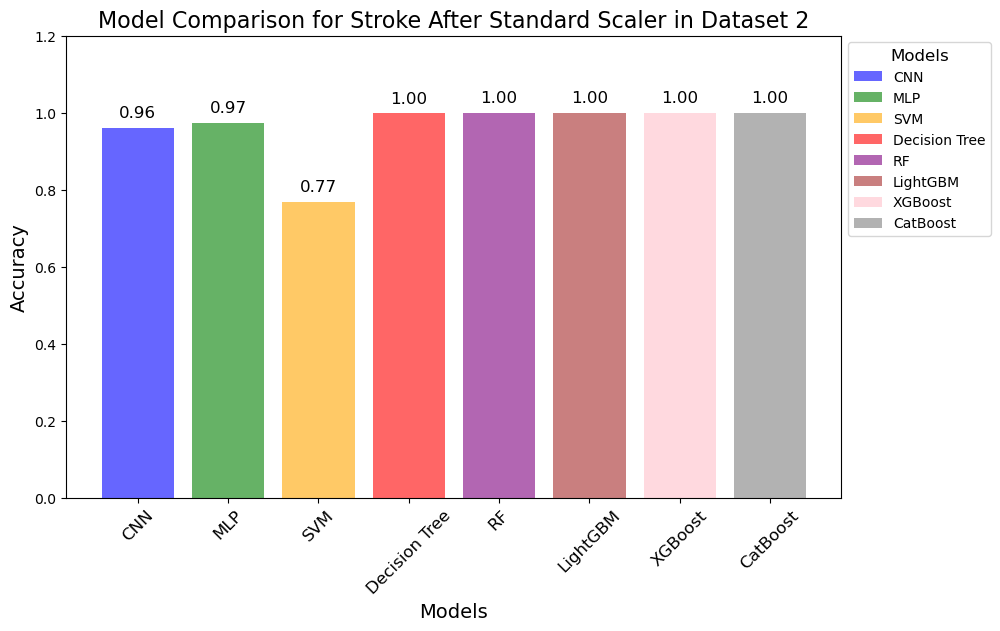

In [57]:
# Compare accuracies
plot_comparison(predictions, 2, 'Stroke After Standard Scaler')

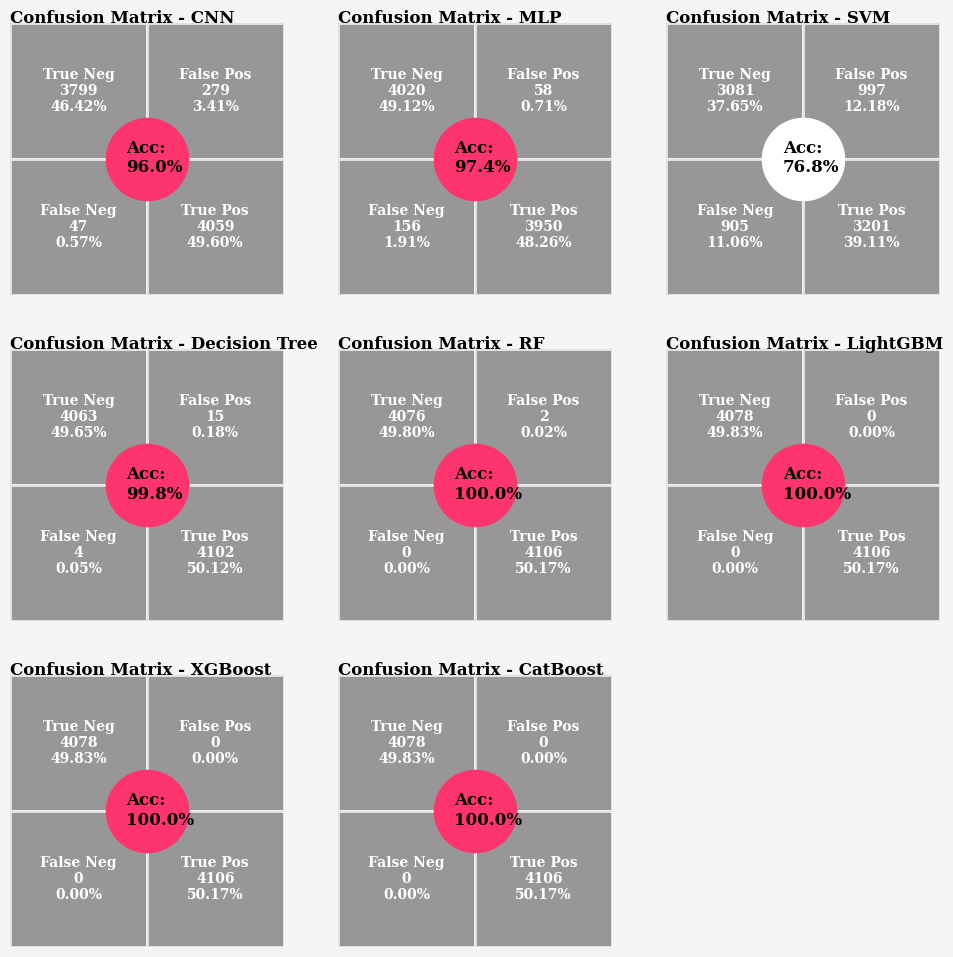

In [58]:
# Compare confusion Matrix
plot_confusion_matrices(predictions, 2, 'Stroke After Standard Scaler')

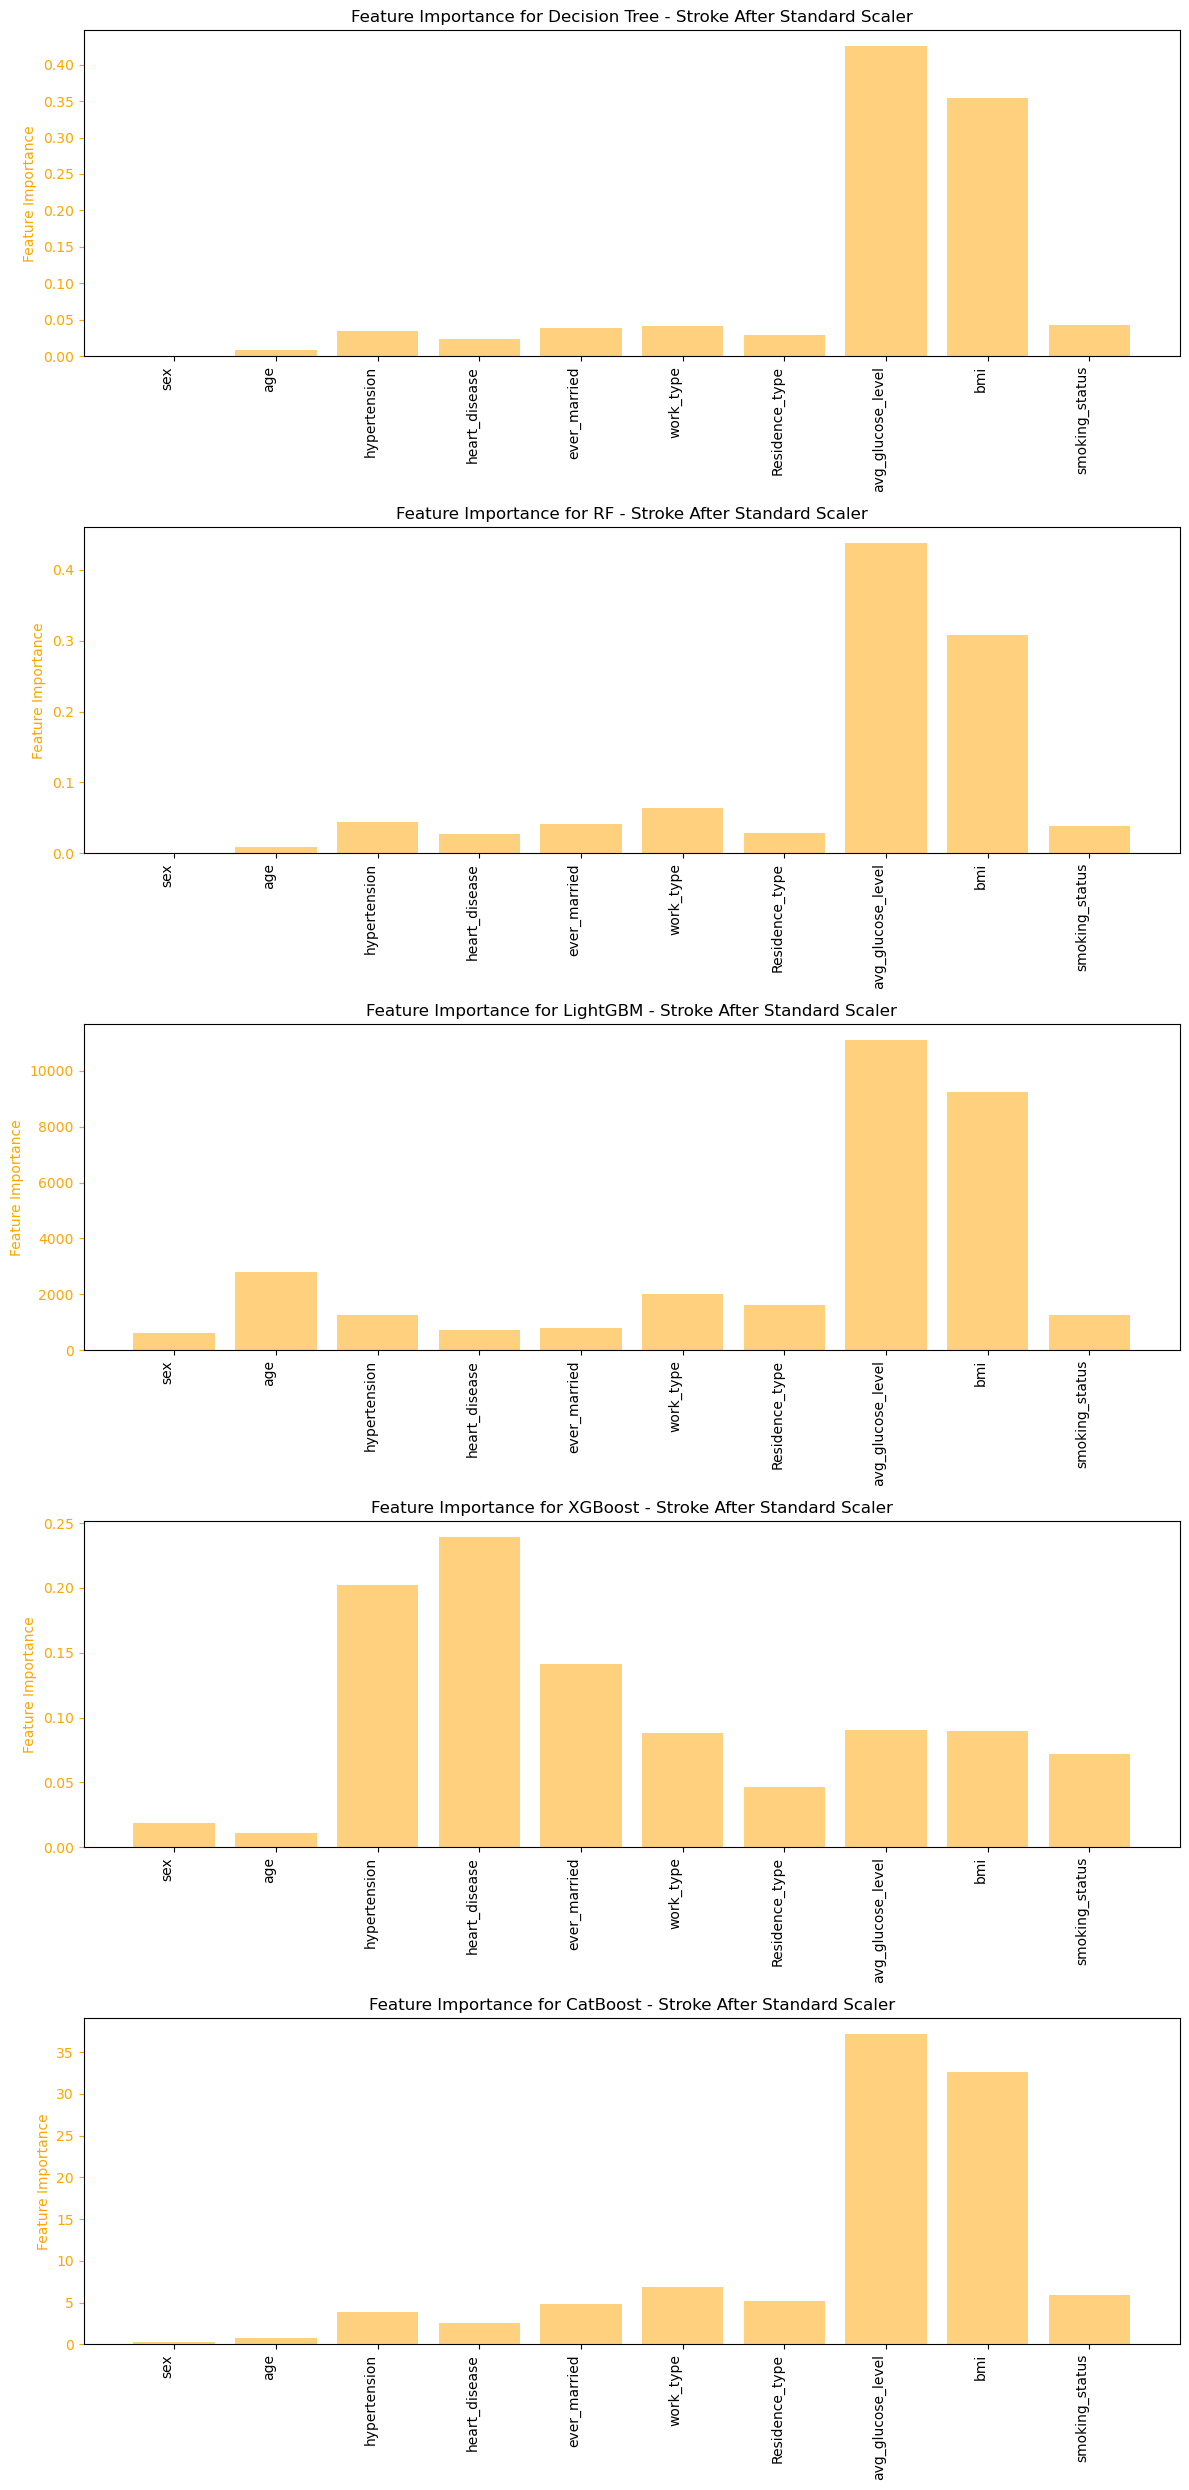

In [59]:
plot_feature_importance(predictions, 2, 'Stroke After Standard Scaler', df2.drop('stroke', axis=1))